# Lending Club Case Study
## Authors
### Siddakka Saptasagare
### Kumaraguru Muthuraj

## Business Understanding
**You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:**
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
<p>
<img src ="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png" alt='Figure 1' style="width:600px;">
<center> <b>Approval - Rejection flow</b> </center> 
 </br>  
</p>

**When a person applies for a loan, there are two types of decisions that could be taken by the company:**

- Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

> Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

> Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

> Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

- Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Business Objectives
**This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.**

**The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.** 

## What are we solving for?
**Lending Club, being headquartered in SFO, CA lends money for cheap interest rates for three major reasons, namely medical, personal and business loans.**

**The history of borrowers between 2007 and 2011 provided will be used to do statistical analysis and provide insights on what parameters of the borrower are related to defaulting. This will help Lending Club avoid lending money to these customers or reduce the loan amount or increase the interest rate.**

## How did we solve?
**We have done extensive EDA on all the parameters in the loan.csv by relating to the meaning in data dictionary. After doing analysis, we have provided multi-perspective analyis and observe the patterns.**

**Once we establish the pattern, we record our conclusion and recommend what the bank should do. Every cell(or group of cells) is dedicated to a set of parameters that we analyze. These indicate the factors impacting defaulting nature of customers.**

**We have used different visualizations to perceive the pattern powerfully which leads to decisions.**

## Executive summary of loan and customer parameters that are risk indicators


### All 3 loan types filtered out for 2011
#### Risk 1 - Loan grades E, F and G are higher risk loans. Looks like LC is already charging higher interest rate to recover faster. When LC issues a high loan amount they have to look at other risk factors listed further. 
#### Risk 2 - Most of the loans above interest rate 15% are at the risk of being charged-off. Higher the interest rate they might be charged-off.
#### Risk 3 - Looks like charged-off loans are from a slightly higher loan amount in the order of 12K and higher. Higher the loan amount its more risky.
#### Risk 4 - Debt consolidation, credit card, small business, other and home improvement reasons have highest charged off debts. 
#### Risk 5 - Rental and Mortage home dwellers have higher charged-off status than owners. A customer from rental home is risky, followed by mortgagers.
#### Risk 6 - The ratio of bankruptcy counts to none is higher for charged-off customers. If a customer declared bankruptcy before, he is more likely to default.
#### Risk 7 - States grouped based on geography, indicate West region has taken more loans. A loan request from western states is risky, especially California. 

### Charged-off loans by Top 4 States, Top 4 issue months and Top 4 purposes.
#### Risk 8 - For either terms, if the interest rate is reduced, defaulting behavior can be reduced.
#### Risk 9 - Its risky to give loans to customers with credit history between 5 to 15 years. For both terms with credit_history, note that the defaulters drastically reduce for both terms 36 and 60 as the credit_history (age of the person) increases. 
#### Risk 10 - Issuing loans in Sep-Dec (specifically Nov and Dec), for the 4 states with debt consolidation as purpose is risky. Customers ask for loan with debt consolidation as a reason in the 4 (especially California) states and default maximum. Towards the end of the year, as celebration begins, customers prepare to take the loan and spend-off and default.
#### Risk 11 - Giving loan to a customer with credit history between 5 - 15 years in the top 4 states, for the last quarter of the year, for top 4 purposes is risky.
#### Risk 12 - Lending money to customers fitting top 4 criteria with employment length less than 2 years is risky.
#### Risk 13 - If a customer fitting top 4 criteria in rental home, applies for loan with purpose debt consolidation in the last 4 months, its risky.
#### Risk 14 - For rental customers, revolving utilization is highest, and specifically, it reduces as they spend more number of years with the same employer. So many reasons for calling rental clients risky.
#### Risk 15 - When loans are issued without source verification, they are very risky.
#### Risk 16 - Rental home defaulters, default within the first 6, 12 and 18 months, if they are employed for a shorter time in their current job.
#### Risk 17 - Its risky to give loan to rental customers, because its risky to recover the amount incase of default.
#### Risk 18 - Risky to give loans to rental customers with higher DTI.



### The insights are provided step-by-step in the form of a story, to grap the most important customer parameters impacting loan defaulting tendency. There are 3 major sections:
### A) Cleaning and preparing data.  
### B) Extensive EDA and multi-perspective visualizations with insights and conclusions for the most representative year.
### C) Risk analysis with TopN criteria for charged-off loans.

# Section (A) Cleaning and preparing data.  

### Step 1. Load the required libraries, open the loan.csv and cleanup data.

In [2]:
# Loading required python libraries
import math
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from datetime import datetime
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading and Extracting the loan zip file
#importing the zipfile library required to extract and read the zip file
import zipfile as zf
filename= 'loan.zip'
loan = zf.ZipFile(filename,'r')
# extracting the files using 'extracall' method
print(loan.printdir())
loan.extractall()

File Name                                             Modified             Size
loan.csv                                       2017-05-16 14:10:10     34813575
None


In [4]:
#Creating the dataframe by using the csv file present in the zip file
df = pd.read_csv(loan.open('loan.csv'),low_memory=False, parse_dates=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#Checking the shape of the dataframe
print(df.shape)

(39717, 111)


In [6]:
#We observed that there are more then 100 columns present in our dataframe
#Lets use set_option to display all the columns of df
pd.set_option('display.max_columns', 200)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
#Lets drop the columns of the df having all NULL or SAME values.
#If half the rows in a column is empty drop the column.
thresh = len(df) * .5 
df.dropna(thresh = thresh, axis = 1, inplace = True)
print(df.shape)
# Lets reset the row index from default to id
df.set_index(['id'], inplace=True)
df.head()

(39717, 54)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
# Checking the null values of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status      

##### In the following step, we see that all of the columns have their data filled. But if you look at the values visually, we see that they are repeated to the extent where it doesn't give any perspective. Drop these columns! 

In [9]:
#print(df['pymnt_plan'].value_counts())
#print(df['url'].value_counts())

#CAN do mining on 'desc' text, but the reasons are already condensed in the 'purpose' column.
#print(df['desc'].value_counts())
#print(df['initial_list_status'].value_counts())
#print(df['collections_12_mths_ex_med'].value_counts())
#print(df['policy_code'].value_counts())
#print(df['application_type'].value_counts())
#print(df['acc_now_delinq'].value_counts())
#print(df['delinq_amnt'].value_counts())
#print(df['tax_liens'].value_counts())

In [10]:
#Let's drop the irrelevent columns to get proper and structured data frame for analysis
#We are dropping the columns because the values of the column or either "0" or same
df.drop(['pymnt_plan','url','desc','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], inplace=True, axis=1)
print(df.shape)

(39717, 42)


### Standardization and data formating of columns.
#### Add columns here as and when required.

In [11]:
# Lets replace special character and convert interest rate and revol_util to float
df.int_rate = df['int_rate'].str.strip('%').astype('float').round()
df.revol_util = df['revol_util'].str.strip('%').astype('float').round()

getTerm = lambda x: x.strip().split(' ')[0]
df['term'] = (df['term'].apply(getTerm)).astype('int')

df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,11.0,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,84.0,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1077430,1314167,2500,2500,2500.0,60,15.0,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.0,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
1077175,1313524,2400,2400,2400.0,36,16.0,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.0,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
1076863,1277178,10000,10000,10000.0,36,13.0,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
1075358,1311748,3000,3000,3000.0,60,13.0,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,54.0,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [12]:
# Lets do the data imputation for emp_title and emp_length columns
#Fill the values with mode of the data, as it makes more sense to do this.
df.emp_title = df.emp_title.fillna(df.emp_title.mode()[0])
df.emp_length = df.emp_length.fillna(df.emp_length.mode()[0])
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,11.0,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,84.0,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1077430,1314167,2500,2500,2500.0,60,15.0,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.0,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
1077175,1313524,2400,2400,2400.0,36,16.0,84.33,C,C5,US Army,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.0,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
1076863,1277178,10000,10000,10000.0,36,13.0,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
1075358,1311748,3000,3000,3000.0,60,13.0,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,54.0,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [13]:
#We need dates so that we can do some arithmetic later.
def getDate(x):
    x = str(x).strip()
    ret = datetime(1900, 1, 1).date()
    if not x:
        return ret
    elif x.upper() == str(float('nan')).upper():
        return ret
    else:    
        ret = datetime.strptime(str(x), '%b-%y').date()
    return ret

df['issue_d'] = df['issue_d'].apply(getDate)
df['issue_year'] = df['issue_d'].apply(lambda x: str(x.year))
df['issue_month'] = df['issue_d'].apply(lambda x: x.strftime('%b').upper())

#print (df[['issue_d_tmp', 'issue_year', 'issue_month']])

def MMM_YY_2_Date(x):
    y = datetime.strptime(x, '%b-%y')
    _2019Date = datetime(2019, 1, 1)
    if y > _2019Date:
        y = y - relativedelta(years = 100)
    return y.date()

df['earliest_cr_line'] = df['earliest_cr_line'].apply(MMM_YY_2_Date)
df['earl_cr_line_month'] = df['earliest_cr_line'].apply(lambda x: x.strftime('%b'))
df['earl_cr_line_year'] = df['earliest_cr_line'].apply(lambda x: str(x.year))

df['credit_history'] = ((df['issue_d'] - df['earliest_cr_line']) / np.timedelta64(1, 'Y')).round()

In [14]:
# Lets standardize the empl_length column
# Less than 1 year be considered 0
def currentEmploymentLength(y):
    if y == None:
        return "invalid"
    y = y.strip()
    if (y.find("< 1") != -1):
        return 0
    result = re.findall("\d+", y)
    if result == None:
        return "invalid"
    return int(result[0])

#Check unique values to know pattern
#print(df.emp_length.value_counts())
df.emp_length = df.emp_length.apply(currentEmploymentLength)
#Validate if the values are as expected
#print(df.emp_length.value_counts())


In [15]:
df['last_credit_pull_month'] = df.last_credit_pull_d.str.split('-').str[0].str.upper()
df['last_credit_pull_Year'] = df.last_credit_pull_d.str.split('-').str[1]

def getLastPaymentDate(x):
    x = str(x).strip()
    ret = datetime(1900, 1, 1).date()
    if not x:
        return ret
    elif x.upper() == str(float('nan')).upper():
        return ret
    else:    
        ret = datetime.strptime(str(x), '%b-%y').date()
    return ret
    
df['last_pymnt_d'] = df['last_pymnt_d'].apply(getLastPaymentDate)
#df['last_pymnt_d_tmp'].head()

#Can we get the month and year string?
df['last_pymnt_month'] = df['last_pymnt_d'].apply(lambda x: x.strftime('%b'))
df['last_pymnt_year'] = df['last_pymnt_d'].apply(lambda x: x.year)

#df[['last_pymnt_d_tmp', 'last_pymnt_month', 'last_pymnt_year']].head()

In [16]:
#Convert to lower case
df['loan_status'] = df['loan_status'].apply(str.lower)
df['verification_status'] = df['verification_status'].apply(str.lower)
df['purpose'] = df['purpose'].apply(str.lower)
df['title'] = df['title'].astype(str).apply(str.lower)

#EMI as a percent of monthly income
df['emi_income_percent'] = (df['installment'] / (df['annual_inc'] /12)) * 100


In [17]:
# Lets check the details of addr_state
print(df.addr_state.unique())

# lets create Region column depedning on the state column value
# https://www.ducksters.com/geography/us_states/us_geographical_regions.php
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

df['Region']= np.nan

def map_region(state):
    if state in west:
        return 'west'
    elif state in south_west:
        return 'south_west'
    elif state in south_east:
        return 'south_east'
    elif state in mid_west:
        return 'mid_west'
    elif state in north_east:
        return 'north_east'
df['Region'] = df['addr_state'].apply(map_region)
df.head()

['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME']


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month,earl_cr_line_month,earl_cr_line_year,credit_history,last_credit_pull_month,last_credit_pull_Year,last_pymnt_month,last_pymnt_year,emi_income_percent,Region
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,11.0,162.87,B,B2,US Army,10,RENT,24000.0,verified,2011-12-01,fully paid,credit_card,computer,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,84.0,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,May-16,0.0,2011,DEC,Jan,1985,27.0,MAY,16,Jan,2015,8.143500,south_west
1077430,1314167,2500,2500,2500.0,60,15.0,59.83,C,C4,Ryder,0,RENT,30000.0,source verified,2011-12-01,charged off,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.0,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,Sep-13,0.0,2011,DEC,Apr,1999,13.0,SEP,13,Apr,2013,2.393200,south_east
1077175,1313524,2400,2400,2400.0,36,16.0,84.33,C,C5,US Army,10,RENT,12252.0,not verified,2011-12-01,fully paid,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.0,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,May-16,0.0,2011,DEC,Nov,2001,10.0,MAY,16,Jun,2014,8.259549,mid_west
1076863,1277178,10000,10000,10000.0,36,13.0,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,source verified,2011-12-01,fully paid,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,Apr-16,0.0,2011,DEC,Feb,1996,16.0,APR,16,Jan,2015,8.275854,west
1075358,1311748,3000,3000,3000.0,60,13.0,67.79,B,B5,University Medical Group,1,RENT,80000.0,source verified,2011-12-01,current,other,personal,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,54.0,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,May-16,0.0,2011,DEC,Jan,1996,16.0,MAY,16,May,2016,1.016850,west


In [18]:
# Lets check the status of the loans given by Lending club
print(df["loan_status"].value_counts())

#Create some filters 
paidOff = df['loan_status'] == 'fully paid'
current = df['loan_status'] == 'current'
chargedOff = df['loan_status'] == 'charged off'

dfPaidOff = df.loc[paidOff]
dfCurrent = df.loc[current]
dfChargedOff = df.loc[chargedOff]

print (dfPaidOff['loan_status'].size)
print (dfCurrent['loan_status'].size)
print (dfChargedOff['loan_status'].size)

df.describe()

fully paid     32950
charged off     5627
current         1140
Name: loan_status, dtype: int64
32950
1140
5627


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,credit_history,last_pymnt_year,emi_income_percent
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39667.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000,39717.000000,39717.000000,39717.000000
mean,8.504636e+05,11219.443815,10947.713196,10397.448868,42.418007,12.011229,324.561922,5.109500,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,48.833514,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260,13.786565,2012.619281,6.580104
std,2.656783e+05,7456.670694,7187.238670,7128.450439,10.622815,3.717187,208.874874,3.607467,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,28.339127,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324,6.857773,5.008101,3.998421
min,7.069900e+04,500.000000,500.000000,0.000000,36.000000,5.000000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1900.000000,0.028895
25%,6.667800e+05,5500.000000,5400.000000,5000.000000,36.000000,9.000000,167.020000,2.000000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,25.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000,9.000000,2012.000000,3.524810
50%,8.508120e+05,10000.000000,9600.000000,8975.000000,36.000000,12.000000,280.220000,5.000000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,49.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000,13.000000,2013.000000,5.800500
75%,1.047339e+06,15000.000000,15000.000000,14400.000000,60.000000,15.000000,430.780000,10.000000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,72.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000,17.000000,2014.000000,8.840533
max,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,25.000000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,100.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000,65.000000,2016.000000,32.026200


#### Analysis of the different loan and consumer attributes

In [19]:
cols = df.columns
for col in cols:
    print(col)

member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
last_credit_pull_d
pub_rec_bankruptcies
issue_year
issue_month
earl_cr_line_month
earl_cr_line_year
credit_history
last_credit_pull_month
last_credit_pull_Year
last_pymnt_month
last_pymnt_year
emi_income_percent
Region


# Section (B) Extensive EDA and multi-perspective visualizations with insights and conclusions for the most representative year.

### Step 1. Lets look at the distribution of loan amount, funded amount and interest rates.
#### Objective: What is the shape of the distribution for loan amount, funded amount and interest rates?

#### Observation: From the above distribution plots we can conclude that the loan amount issued, loan amount funded and the interest rate are bell shaped by skewed to the left.

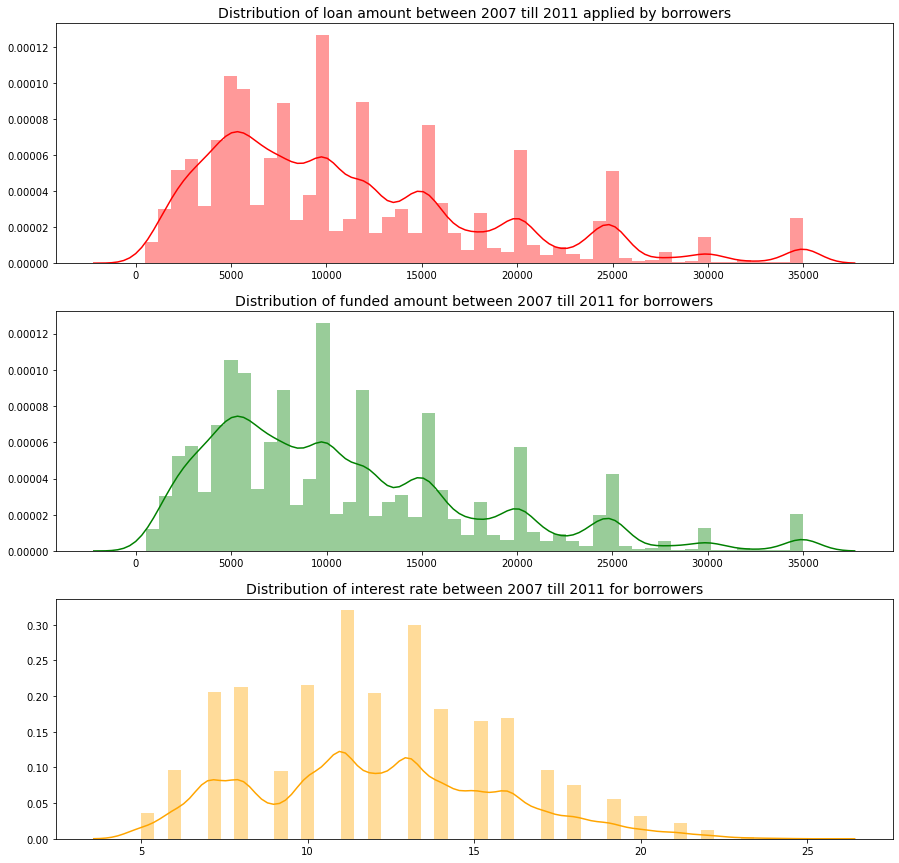

In [20]:
Loan_Amount = df.loan_amnt.values
Funded_Amount= df.funded_amnt.values
Interest_Rate =df.int_rate.values

fig, ax = plt.subplots(3, 1, figsize=(15,15))

# Lets draw the distribution plot for the above subsets
sns.distplot(Loan_Amount, ax=ax[0], color='red')
sns.distplot(Funded_Amount, ax=ax[1], color='green')
sns.distplot(Interest_Rate, ax=ax[2], color='orange')

# Lets set the title for each plots
ax[0].set_title("Distribution of loan amount between 2007 till 2011 applied by borrowers", fontsize=14)
ax[1].set_title("Distribution of funded amount between 2007 till 2011 for borrowers", fontsize=14)
ax[2].set_title("Distribution of interest rate between 2007 till 2011 for borrowers", fontsize=14)
plt.show()

### Step 2. What amount of loan was given each year? How many loans were given each year?
#### Objective: We want to find any patterns of increase in loan counts and amounts between 2007 and 2011

#### Observation: From the bar chart, the mean amount of loan gradually increased from 8KUSD to 12KUSD from 2007 to 2011. Indicates slight growth in business. From the line plot, we see that the number of loans exponentially increased in the same years.

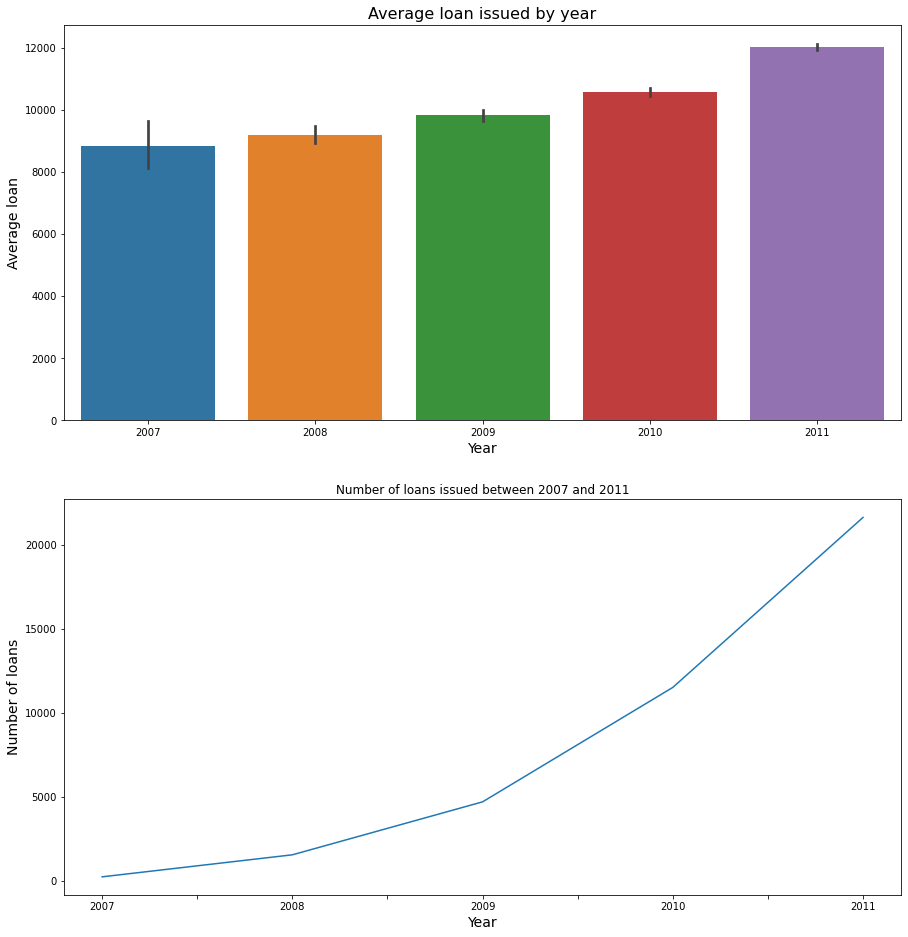

In [21]:
#Lets plot a bar graph to see the average loan amount vs for each Year
plt.figure(figsize=(15,16))
plt.subplot(2,1,1)
sns.barplot('issue_year', 'loan_amnt', data=df)
plt.title('Average loan issued by year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan', fontsize=14)

#Lets plot a line chart to see the number of loans for each year
plt.subplot(2,1,2)
g = df.groupby('issue_year')['loan_amnt'].count()
g.plot.line(x_compat=True)
#plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('Number of loans issued between 2007 and 2011')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of loans', fontsize=14)

plt.show()

## Step 3. What is the percent of loans are fully paid, current and charged-off?

#### Lets see the number of Bad loans in dataframe to find out the risk of loan falling into default category.
#### Objective: Across the years and in total, what percent of loans were fully paid, currently running and defaulted?
#### Observation: The pie-chart is for the entire period from 2007 to 2011. 83% of loans are fully paid, and 2.9% are currently running and about 14.2% are charged off. If we break it year-wise, the loans are current only in the last year. Maximum charge-off happened in 2011.

In [22]:
# Lets check the status of the loans given by Lending club
df["loan_status"].value_counts()

fully paid     32950
charged off     5627
current         1140
Name: loan_status, dtype: int64

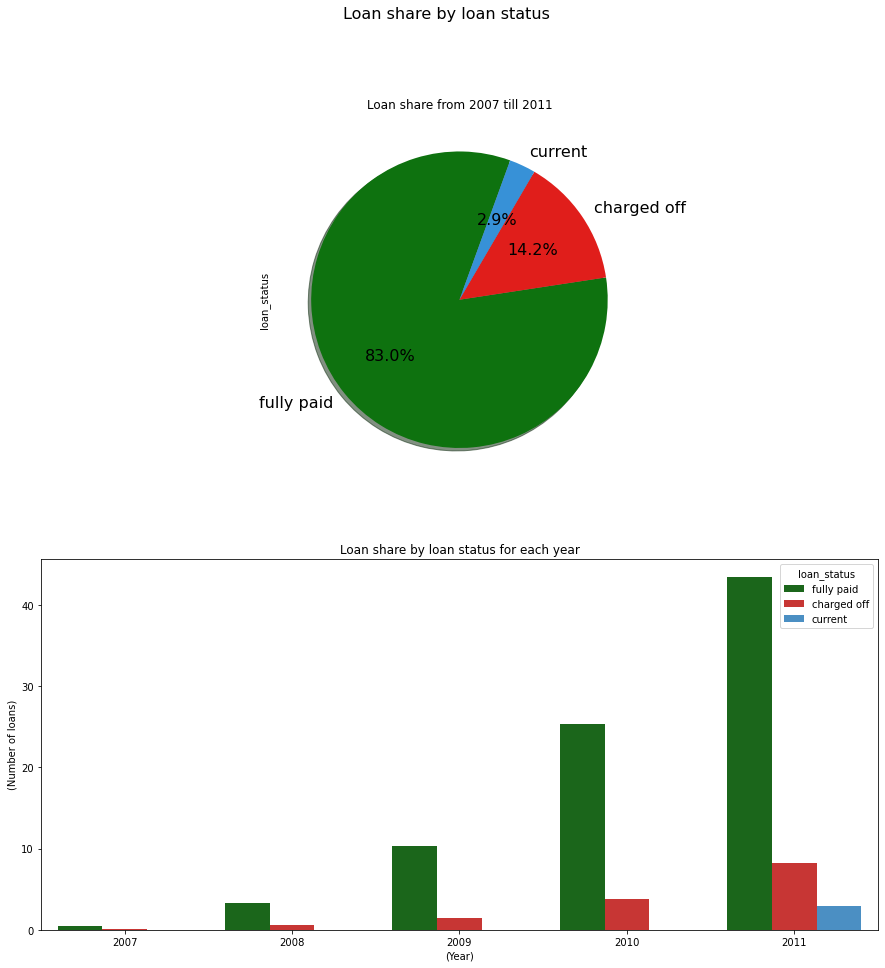

In [23]:
#Plotting Pie chart for loan share by status across all the years
f, ax = plt.subplots(2, 1, figsize=(15, 15))
# Plotting Pie chart
plt.suptitle('Loan share by loan status', fontsize=16)
palette = ["#0E720F","#E01E1B", "#3791D7"]
df["loan_status"].value_counts().plot.pie(ax=ax[0], colors = palette, \
                                          shadow=True,  fontsize=16, startangle=70, autopct='%1.1f%%')
ax[0].set(title = "Loan share from 2007 till 2011")

#Plotting Bar Chart to depict loan share by status for each year
sns.barplot(x="issue_year", y="loan_amnt", hue="loan_status", \
            data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(Number of loans)")
ax[1].set(xlabel="(Year)")
ax[1].set(title="Loan share by loan status for each year")
plt.show()

# Step 4. Are we going to do analysis for the entire popluation or filtering out? 
### Since we have most loans and charge-offs in 2011 this could be a representative of the dataset. We are indirectly stratifying the sample across the 3 statuses by picking 2011. Another way is to pick top 3 - 4 loans in each category, say top 4 months, 4 states and 4 reasons. We have analysed data for both 2011 in isolation and with topN approach. 

### In this Section (B) we will look at the 2011 dataframe as a whole and look at all 3 loan status values. The problem is to analyze charged-off loans which we will specifically address in Section (C). Yes, we will look at only charged-off loans with TopN criteria.

In [24]:
#fltr = df['loan_status'].isin(["charged off"])
#pt = pd.pivot_table(data=df[fltr], values=['loan_amnt'], index=['grade'], aggfunc=np.median)
#pt.plot(kind="bar", figsize=[20,15])

In [25]:
#lets do the filtering of the df for 2011 to do the further analysis
df = df.loc[(df['issue_year'] == "2011"), :]
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month,earl_cr_line_month,earl_cr_line_year,credit_history,last_credit_pull_month,last_credit_pull_Year,last_pymnt_month,last_pymnt_year,emi_income_percent,Region
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,11.0,162.87,B,B2,US Army,10,RENT,24000.0,verified,2011-12-01,fully paid,credit_card,computer,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,84.0,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,May-16,0.0,2011,DEC,Jan,1985,27.0,MAY,16,Jan,2015,8.143500,south_west
1077430,1314167,2500,2500,2500.0,60,15.0,59.83,C,C4,Ryder,0,RENT,30000.0,source verified,2011-12-01,charged off,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.0,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,Sep-13,0.0,2011,DEC,Apr,1999,13.0,SEP,13,Apr,2013,2.393200,south_east
1077175,1313524,2400,2400,2400.0,36,16.0,84.33,C,C5,US Army,10,RENT,12252.0,not verified,2011-12-01,fully paid,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.0,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,May-16,0.0,2011,DEC,Nov,2001,10.0,MAY,16,Jun,2014,8.259549,mid_west
1076863,1277178,10000,10000,10000.0,36,13.0,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,source verified,2011-12-01,fully paid,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,Apr-16,0.0,2011,DEC,Feb,1996,16.0,APR,16,Jan,2015,8.275854,west
1075358,1311748,3000,3000,3000.0,60,13.0,67.79,B,B5,University Medical Group,1,RENT,80000.0,source verified,2011-12-01,current,other,personal,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,54.0,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,May-16,0.0,2011,DEC,Jan,1996,16.0,MAY,16,May,2016,1.016850,west


## Step 5. What does grade mean? Does it have any relationship to loan amount?

#### Objective: What do grades mean? Does defaulting happen based on these?
#### Observation: The bar chart shows that grades E, F and G are higher loan amounts and they charged-off frequency is also high in them. Also the interest rates are higher in these grades.
### Conclusion: When LC issues a high loan amount they have to look at other risk factors discussed further. Loan grades E, F and G are higher risk loans. Looks like LC is already charging higher interest rate to recover faster.

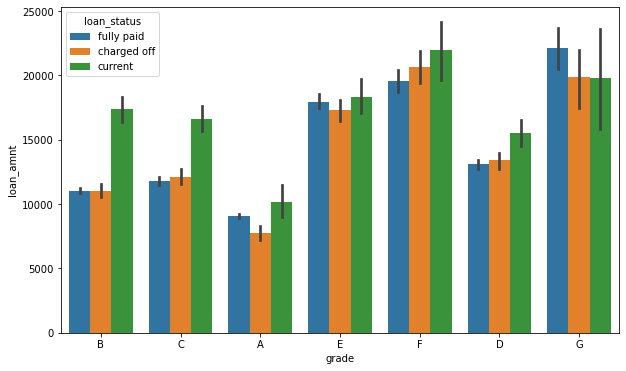

In [26]:
# Lets barplot loan amount across loan grades and categorize the grades by loan status.
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=df)
plt.show()

In [27]:
# Sorting the D1 dataframe in desc order of raised amount to get top 3 sectors for investment company name
df_grade= df.groupby(['grade','loan_status'])['int_rate'].median().reset_index().sort_values('int_rate', ascending =True)
df_grade.head()

,grade,loan_status,int_rate
2,A,fully paid,7.0
0,A,charged off,8.0
1,A,current,8.0
3,B,charged off,11.0
5,B,fully paid,11.0


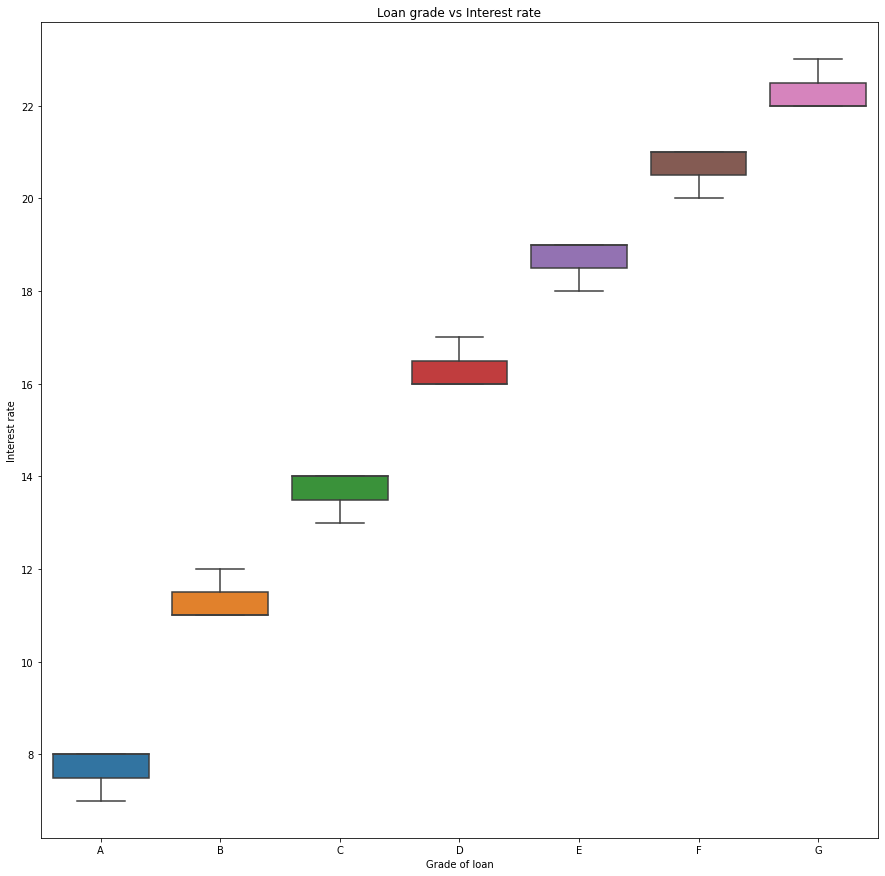

In [28]:
# Lets see the relation of loan grade and the interest rate
plt.figure(figsize=(15,15))
sns.boxplot(y='int_rate', x='grade', data=df_grade)
plt.ylabel('Interest rate')
plt.xlabel('Grade of loan')
plt.title('Loan grade vs Interest rate')
plt.show()

## Step 6. Is interest rate impacting charged-off status? 

#### Objective: Does interest rate and charged-off status have any relationship?
#### Observation: The boxplots show that when representative interest rate is 14% or more, they have higher chance of being charged-off. 
### Conclusion:  Most of the loans above interest rate 15% are at the risk of being charged-off. Current cannot have a say here because they are in progress. But, higher the interest rate they might be charged-off. 

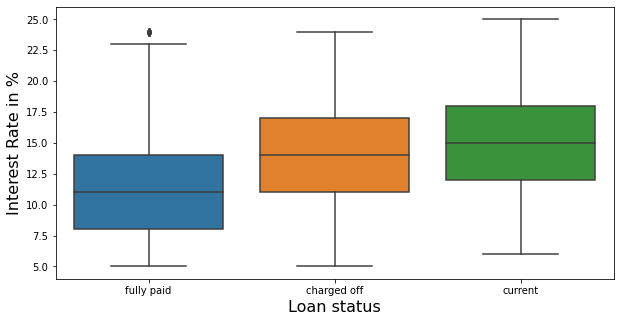

In [29]:
# Lets see the relationship between interest rate and loan status
plt.figure(figsize=(10,5))
sns.boxplot(y='int_rate', x='loan_status', data=df)
plt.ylabel('Interest Rate in %', fontsize=16)
plt.xlabel('Loan status', fontsize=16)
plt.show()

In [30]:
#Discuss with Siddakka, to drop this. There is an error with the estimator function choice
# lets plot a graph to check the impact of employee experience on loan issued
#plt.figure(figsize=(6,4))
#sns.barplot(y='emp_length', x='loan_status', data=df, estimator=np.median)
#plt.xlabel('Working Experience of the employees')
#plt.show()

#df['emp_length'].head()

#fltr = df['loan_status'].isin(["charged off"])
#pt = pd.pivot_table(data=df, columns=['emp_length'], values=['loan_amnt'], index=['loan_status'], aggfunc="count")
#pt.plot(kind="bar", figsize=[20,15])

## Step 7. How is the income spread? How is the loan amount spread? Purpose of loan? Is home ownership having any influence? Anything to do with bankruptcy counts? Will it help group states in to regions?

#### Objective: Understand if any other factors have any influence of charged-off status.
#### Observation:  Most of the loans are spread between 5K to 15K. Most of the borrowers have income between 50K to 120K.
### Conclusion: Many conclusions from this step. 
- Looks like charged-off loans are from a slightly higher loan amount in the order of 12K and higher. 
- Debt consolidation, credit card, small business, other and home improvement reasons have highest charged off debts. 
- Rental and Mortage home dwellers have higher charged-off status than owners. 
- The ratio of bankruptcy counts to none is higher for charged-off customers. 
- States grouped based on geography, indicate West region has taken more loans. 

In [31]:
#Calculate loan_result as a percentage of amount recovered. This will be more than 100 for fully paid and 
#less than 100 for charged-off loans
df['loan_result']= (df['total_pymnt']-df['funded_amnt'])*100 / df['funded_amnt']

#Loan to income Ratio
df['loan_to_inc_ratio'] = df.funded_amnt*100 / df.annual_inc

# Annual income in thousand Dollars
df['annual_inc'] = df['annual_inc'] / 1000
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month,earl_cr_line_month,earl_cr_line_year,credit_history,last_credit_pull_month,last_credit_pull_Year,last_pymnt_month,last_pymnt_year,emi_income_percent,Region,loan_result,loan_to_inc_ratio
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,11.0,162.87,B,B2,US Army,10,RENT,24.000,verified,2011-12-01,fully paid,credit_card,computer,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,84.0,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,May-16,0.0,2011,DEC,Jan,1985,27.0,MAY,16,Jan,2015,8.143500,south_west,17.263104,20.833333
1077430,1314167,2500,2500,2500.0,60,15.0,59.83,C,C4,Ryder,0,RENT,30.000,source verified,2011-12-01,charged off,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.0,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,Sep-13,0.0,2011,DEC,Apr,1999,13.0,SEP,13,Apr,2013,2.393200,south_east,-59.651600,8.333333
1077175,1313524,2400,2400,2400.0,36,16.0,84.33,C,C5,US Army,10,RENT,12.252,not verified,2011-12-01,fully paid,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.0,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,May-16,0.0,2011,DEC,Nov,2001,10.0,MAY,16,Jun,2014,8.259549,mid_west,25.236119,19.588639
1076863,1277178,10000,10000,10000.0,36,13.0,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49.200,source verified,2011-12-01,fully paid,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,Apr-16,0.0,2011,DEC,Feb,1996,16.0,APR,16,Jan,2015,8.275854,west,22.318900,20.325203
1075358,1311748,3000,3000,3000.0,60,13.0,67.79,B,B5,University Medical Group,1,RENT,80.000,source verified,2011-12-01,current,other,personal,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,54.0,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,May-16,0.0,2011,DEC,Jan,1996,16.0,MAY,16,May,2016,1.016850,west,17.111000,3.750000


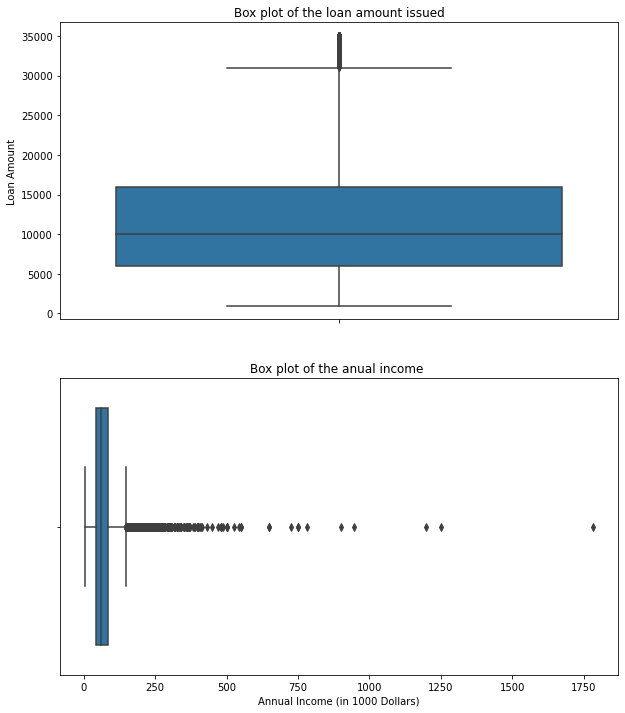

In [32]:
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
sns.boxplot( y=df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.title('Box plot of the loan amount issued')

plt.subplot(2,1,2)
sns.boxplot( x=df["annual_inc"] )
plt.xlabel('Annual Income (in 1000 Dollars)')
plt.title('Box plot of the anual income ')
plt.show()

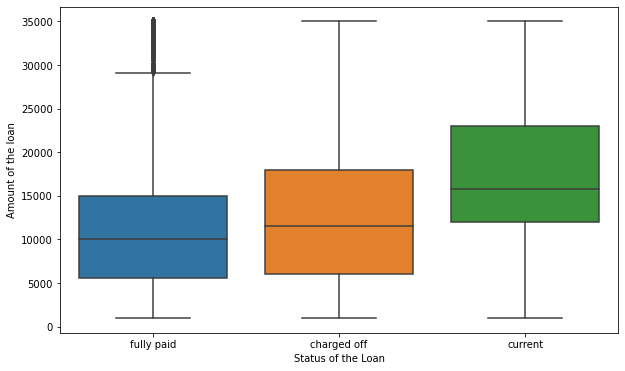

In [33]:
# Lets see if there is any relationship between the loan amount funded and the loan status
plt.figure(figsize=(10,6))
sns.boxplot( y="loan_amnt", x='loan_status' , data=df)
plt.ylabel('Amount of the loan')
plt.xlabel('Status of the Loan')
plt.show()

In [34]:
# Siddakka - We might have t o drop this off.

# Lets draw a graph to show the loan status vs purpose
#plt.figure(figsize=(10,6))
#sns.countplot(x='verification_status', hue="loan_status", data=df)
#plt.ylabel('Loan counts')
#plt.xlabel('Verified - unverified status')
#plt.title(' Categorize loan status based on verification status')
#plt.show()

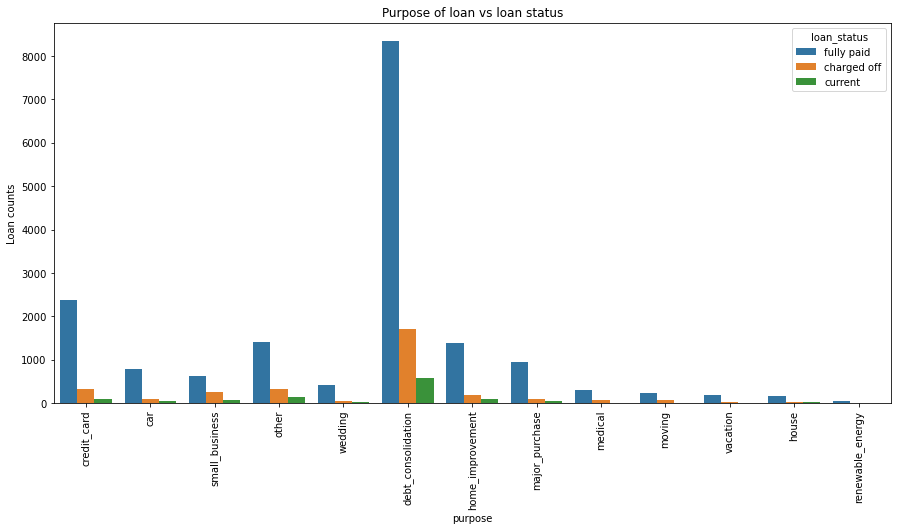

In [35]:
# Lets check the details of loan purpose
df.purpose.unique()

# Lets draw a graph to show the loan status vs purpose
plt.figure(figsize=(15,7))
sns.countplot(x='purpose', hue="loan_status", data=df)
plt.ylabel('Loan counts')
plt.title("Purpose of loan vs loan status")
plt.xticks(rotation=90)
plt.show()

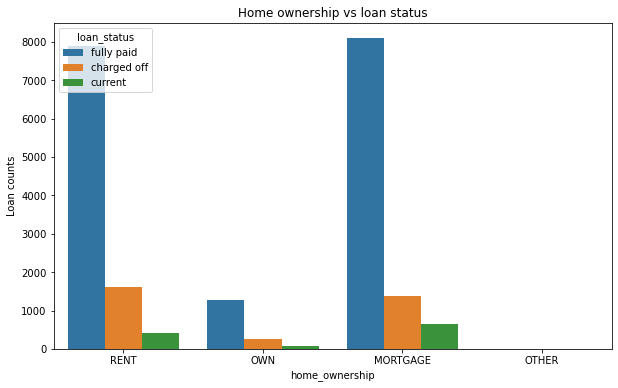

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x='home_ownership',hue='loan_status', data=df)
plt.ylabel('Loan counts')
plt.title("Home ownership vs loan status")
plt.show()

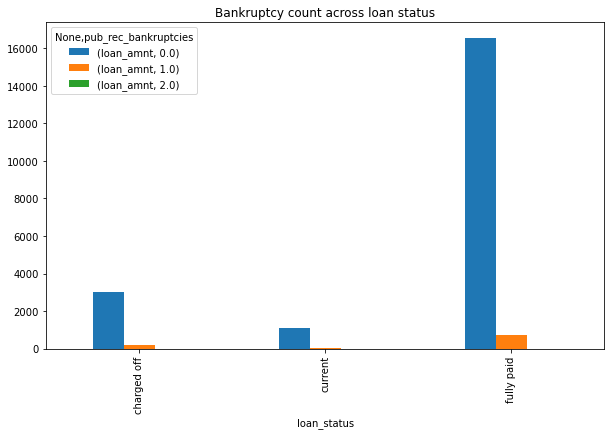

In [37]:
pt = pd.pivot_table(data=df, columns=['pub_rec_bankruptcies'], values=['loan_amnt'], index=['loan_status'], aggfunc="count")
pt.plot(kind="bar", figsize=[10,6])
plt.title("Bankruptcy count across loan status", fontsize = 12) 
plt.show()

In [38]:
#Siddakka - Doesn't require this. Its covered in pervious step.
#plt.figure(figsize=(15,7))
#plt.title(' Loan amount vs public bankruptcies')

#sns.barplot(x='loan_status', y='pub_rec_bankruptcies', data=df)
#plt.title(' Loan status vs public bankruptcies')
#plt.show()

In [39]:
# Lets create a loan_group df to see the insights
Loan_group = df.groupby(['issue_month','Region'], as_index=False).sum()
#Scale down by 1000 Dollars
Loan_group.loan_amnt = Loan_group.loan_amnt / 1000
Loan_group.head()

,issue_month,Region,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,credit_history,last_pymnt_year,emi_income_percent,loan_result,loan_to_inc_ratio
0,APR,mid_west,225396683,2588.225,2585225,2.572786e+06,11472,2918.0,70190.42,1394,14897.21532,3584.85,35,263,2330,18,2773544,11331.0,5592,0.00,0.00,2.824374e+06,2810373.60,2176378.81,608127.49,270.691907,39597.15,5368.6197,681153.95,16.0,3290.0,495278,1550.931824,1983.629636,4725.314335
1,APR,north_east,358445780,4477.150,4477150,4.411015e+06,17616,4579.0,126762.64,2014,26693.64767,5280.91,74,307,3612,24,4873054,18502.0,8420,42.66,42.63,5.172458e+06,5094896.35,4162049.47,974598.72,580.508599,35229.42,5841.0813,1125265.96,16.0,5259.0,785056,2486.292335,5561.924237,7309.140511
2,APR,south_east,328407967,4116.975,4107575,4.042826e+06,16428,4128.0,111923.04,1924,23814.31408,5034.17,65,272,3325,20,4949903,15755.0,8267,0.00,0.00,4.554847e+06,4509198.80,3620398.09,903333.47,271.580791,30843.92,3244.8655,1012282.27,17.0,5170.0,718672,2248.486679,3385.291418,6784.270641
3,APR,south_west,147080423,1769.750,1769750,1.738165e+06,7320,1872.0,48317.61,798,11045.10800,2222.82,17,124,1469,10,1741195,7995.0,3913,0.00,0.00,2.037388e+06,1997637.37,1626797.17,405533.00,192.304816,4865.69,222.7633,575282.11,10.0,2210.0,322109,915.859026,1790.342285,2767.772444
4,APR,west,376119207,4569.975,4560300,4.534676e+06,18156,4804.0,129967.50,2165,26684.88844,5427.53,70,285,3550,16,5303138,19854.0,8407,0.00,0.00,4.937160e+06,4900750.93,3978335.50,923055.44,285.559849,35483.50,2195.1842,1255917.69,16.0,5576.0,823423,2650.593719,3499.831891,7689.639287


In [40]:
# lets plot the graph to see correlation
df_dates = pd.DataFrame(data=Loan_group[['issue_month','Region','loan_amnt']])
by_issued_amount = df_dates.groupby(['issue_month', 'Region']).loan_amnt.sum()
by_issued_amount.head()

issue_month  Region    
APR          mid_west      2588.225
             north_east    4477.150
             south_east    4116.975
             south_west    1769.750
             west          4569.975
Name: loan_amnt, dtype: float64

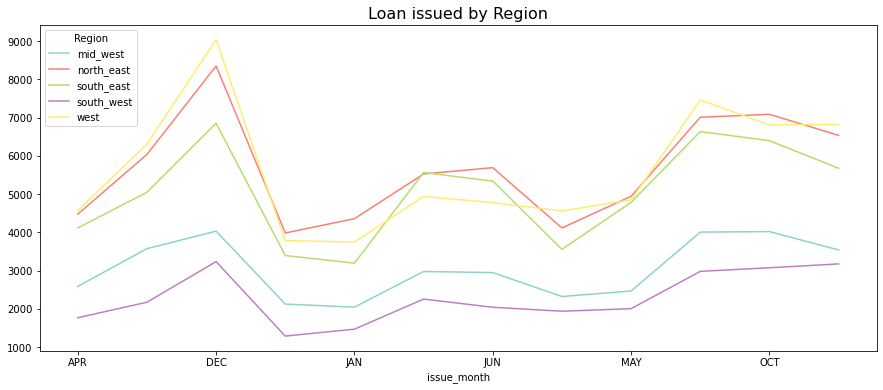

In [41]:
# lets plot the graph to see correlation
#plt.style.use("grayscale")
cmap = plt.cm.Set3
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True,figsize=(15,6))
plt.title('Loan issued by Region', fontsize=16)
plt.show()

## Step 8. Will it help group states in to regions? Lets look at mean interest rates, employee length, debt-to-income ratio and annual income across the regions for anything abnormal.

#### Objective: Understand if any pattern emerges across regions.
#### Observation:  
- Customers with lowest average annual income have taken loans in December.
- Average employment length of Customers is lowest in January.
- Across regions, Jan had lowest interet rate and Dec had highest.
- Customers who took loans in December seem to have  the highest DTI.
- West, north-east, south-east have the highest default loans.
- Small business, debt consolidation, credit card, major purchase seem to be the top reasons for charged-off loans with high loan/income ratio.
- For mid-west region, the loan/income ratio is highest and in general this ratio is high for charged-off customers.
- Though there are positive and negative correlations, these don't relate to charged-off status.
- Customers, charged higher interest rates are more frequently delinquent. Customers, charged higher interest rates are having more open accounts and total accounts.
- LC is already charging higher interest rates for higher salaried customers.
- Debt/Income ratio is lower as income increases.
- Higher grade loans have higher interest rates and higher loan amounts towards end of the year.

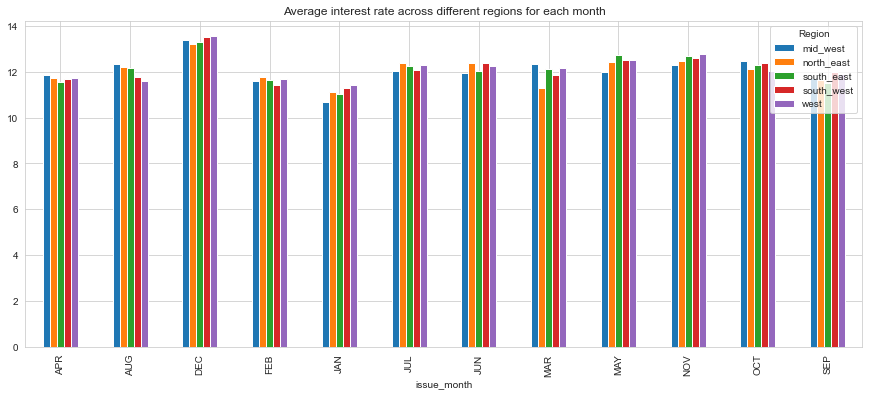

In [42]:
# lets draw the plot
sns.set_style('whitegrid')
by_int_rate = df.groupby(['issue_month', 'Region']).int_rate.mean()
by_int_rate.unstack().plot(kind='bar', stacked=False, grid=True, legend=True,figsize=(15,6))
plt.title('Average interest rate across different regions for each month')
plt.show()

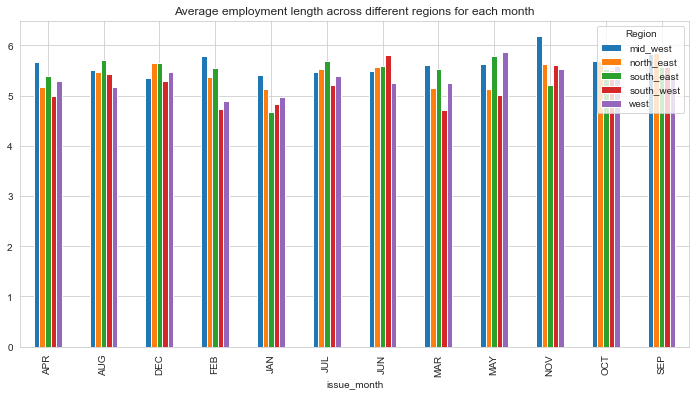

In [43]:
sns.set_style('whitegrid')
by_emp_length = df.groupby(['issue_month', 'Region']).emp_length.mean()
by_emp_length.unstack().plot(kind='bar', stacked=False, grid=True, legend=True,figsize=(12,6))
plt.title('Average employment length across different regions for each month')
plt.show()


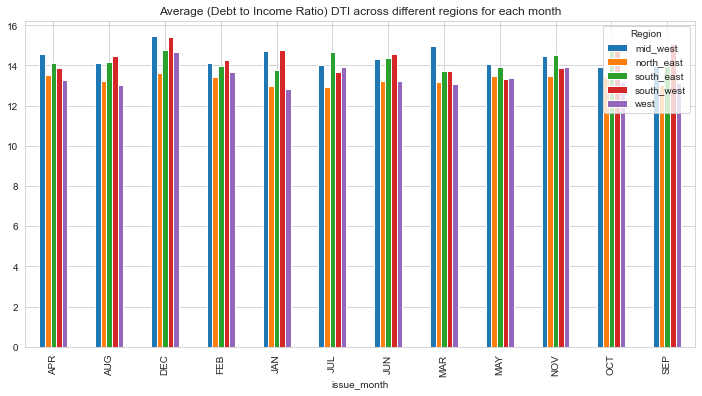

In [44]:
sns.set_style('whitegrid')
by_dti = df.groupby(['issue_month', 'Region']).dti.mean()
by_dti.unstack().plot(kind='bar', stacked=False, grid=True, legend=True,figsize=(12,6))
plt.title('Average (Debt to Income Ratio) DTI across different regions for each month')
plt.show()

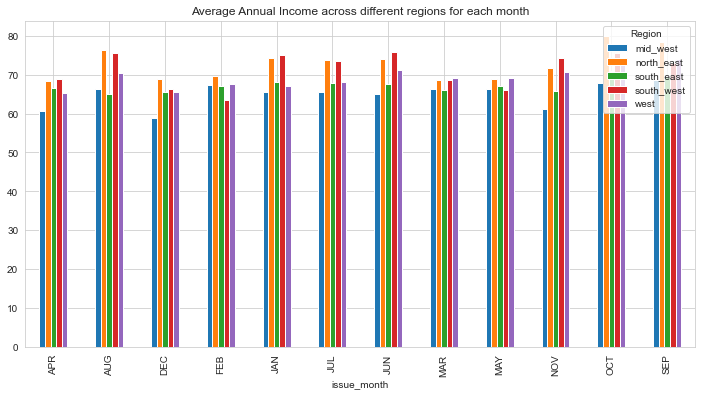

In [45]:
sns.set_style('whitegrid')
by_income = df.groupby(['issue_month', 'Region']).annual_inc.mean()
by_income.unstack().plot(kind='bar', stacked=False, grid=True, legend=True,figsize=(12,6))
plt.title('Average Annual Income across different regions for each month')
plt.show()

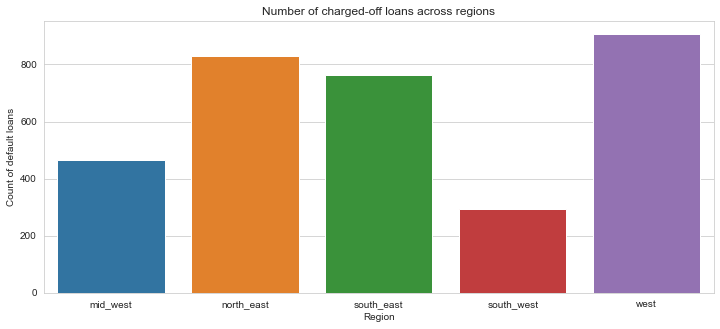

In [46]:
#Lets check the region wise loan status
plt.figure(figsize=(12,5))
g = df[df['loan_status'] == 'charged off'].groupby('Region')['loan_status'].count().reset_index()
sns.barplot(x='Region', y='loan_status', data=g)
plt.ylabel('Count of default loans')
plt.xlabel('Region')
plt.title('Number of charged-off loans across regions')
plt.show()

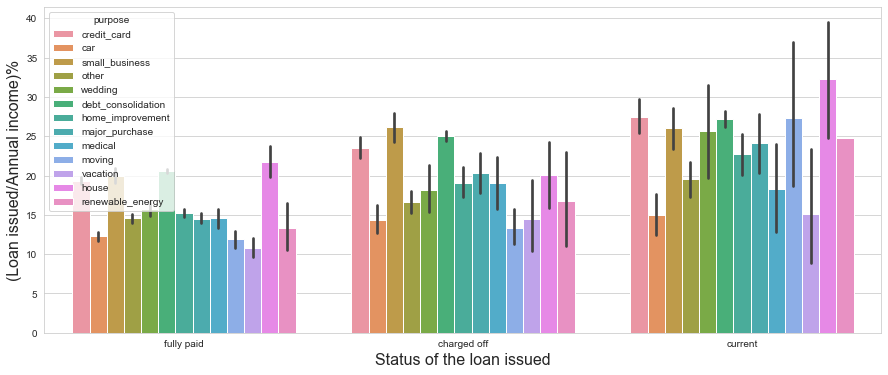

In [47]:
#Lets check the relationship between loan to income ratio vs loan status for different purposes
plt.figure(figsize=(15,6))
sns.barplot(x='loan_status', y='loan_to_inc_ratio', hue='purpose', data=df)
plt.xlabel('Status of the loan issued', fontsize="16")
plt.ylabel('(Loan issued/Annual income)%', fontsize="16")
plt.show()

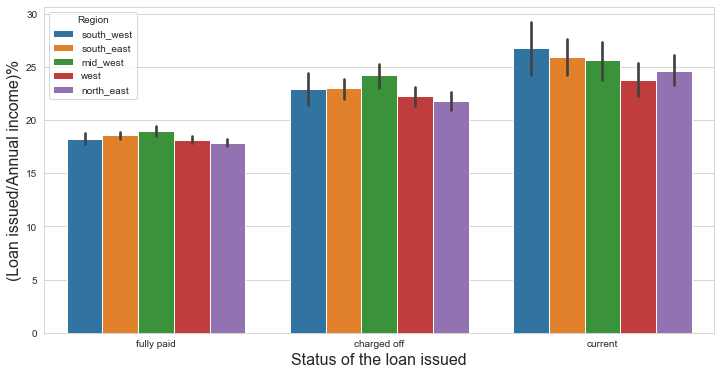

In [48]:
#Lets check the relation between loan to income ratio vs loan status for different Region
plt.figure(figsize=(12,6))
sns.barplot(x='loan_status',y='loan_to_inc_ratio',hue='Region',data=df)
plt.xlabel('Status of the loan issued', fontsize="16")
plt.ylabel('(Loan issued/Annual income)%', fontsize="16")
plt.show()

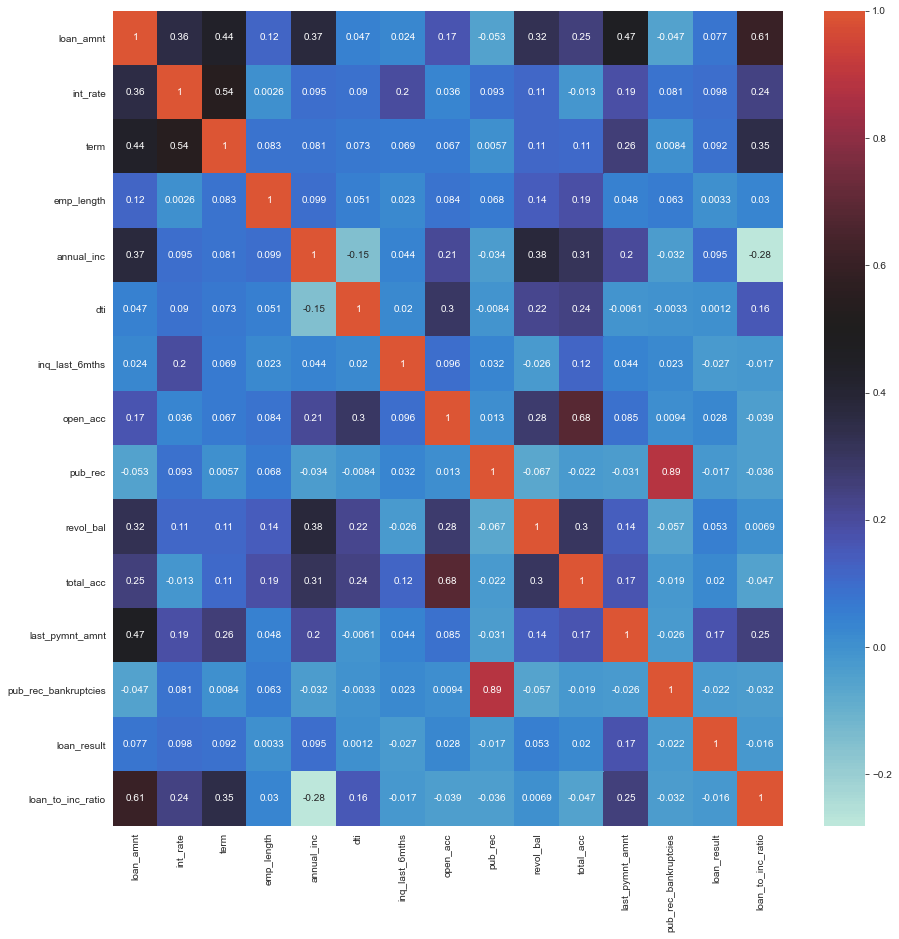

In [49]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'term','emp_length', 'annual_inc','dti', 'grade', 'Region','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','pub_rec_bankruptcies','loan_result','loan_to_inc_ratio']
corr = df[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)
plt.show()

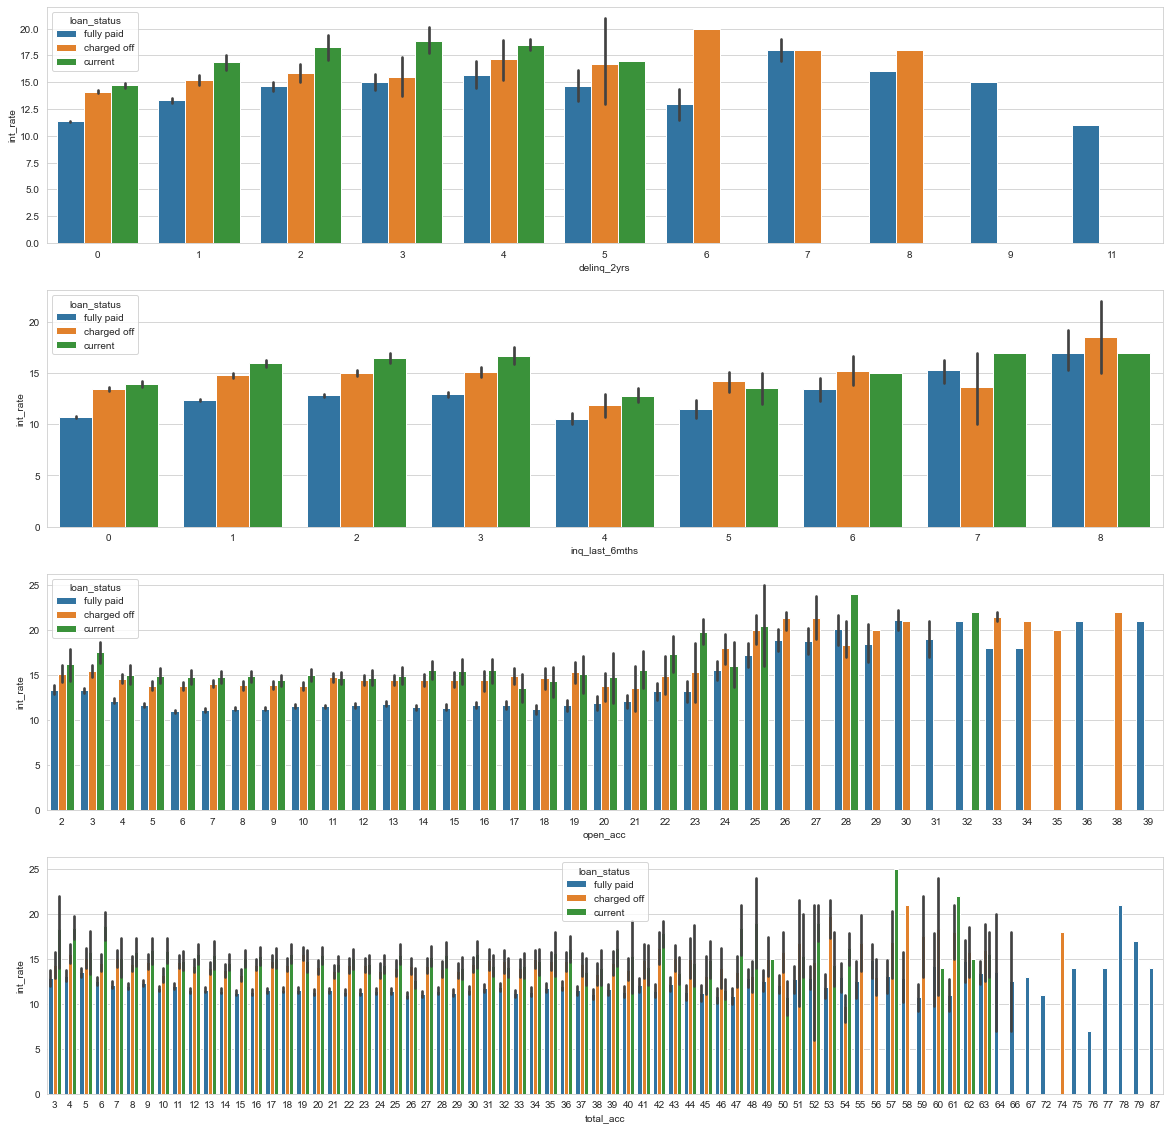

In [50]:
#Analyze interest rate and loan status for delinquent frequency in 2 years, inquiry count in last 6 months, 
#number of open accounts and total accounts
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=df, estimator=np.mean)
plt.subplot(4,1,2)
sns.barplot(x='inq_last_6mths', y='int_rate', hue='loan_status',data=df, estimator=np.mean)
plt.subplot(4,1,3)
sns.barplot(x='open_acc', y='int_rate', hue='loan_status',data=df, estimator=np.mean)
plt.subplot(4,1,4)
sns.barplot(x='total_acc', y='int_rate', hue='loan_status',data=df, estimator=np.mean)
plt.show()

In [51]:
#Categorize the income
df['income_category'] = np.nan
lst = [df]
for col in lst:
    col.loc[col['annual_inc'] <= 50, 'income_category'] = 'Low'
    col.loc[(col['annual_inc'] > 50) & (col['annual_inc'] <= 75), 'income_category'] = 'Medium'
    col.loc[col['annual_inc'] > 75, 'income_category'] = 'High'
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month,earl_cr_line_month,earl_cr_line_year,credit_history,last_credit_pull_month,last_credit_pull_Year,last_pymnt_month,last_pymnt_year,emi_income_percent,Region,loan_result,loan_to_inc_ratio,income_category
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,11.0,162.87,B,B2,US Army,10,RENT,24.000,verified,2011-12-01,fully paid,credit_card,computer,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,84.0,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,May-16,0.0,2011,DEC,Jan,1985,27.0,MAY,16,Jan,2015,8.143500,south_west,17.263104,20.833333,Low
1077430,1314167,2500,2500,2500.0,60,15.0,59.83,C,C4,Ryder,0,RENT,30.000,source verified,2011-12-01,charged off,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.0,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,Sep-13,0.0,2011,DEC,Apr,1999,13.0,SEP,13,Apr,2013,2.393200,south_east,-59.651600,8.333333,Low
1077175,1313524,2400,2400,2400.0,36,16.0,84.33,C,C5,US Army,10,RENT,12.252,not verified,2011-12-01,fully paid,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.0,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,May-16,0.0,2011,DEC,Nov,2001,10.0,MAY,16,Jun,2014,8.259549,mid_west,25.236119,19.588639,Low
1076863,1277178,10000,10000,10000.0,36,13.0,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49.200,source verified,2011-12-01,fully paid,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,Apr-16,0.0,2011,DEC,Feb,1996,16.0,APR,16,Jan,2015,8.275854,west,22.318900,20.325203,Low
1075358,1311748,3000,3000,3000.0,60,13.0,67.79,B,B5,University Medical Group,1,RENT,80.000,source verified,2011-12-01,current,other,personal,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,54.0,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,May-16,0.0,2011,DEC,Jan,1996,16.0,MAY,16,May,2016,1.016850,west,17.111000,3.750000,High


In [52]:
#lets drop the loans of status current
#Map 0 as good loan and 1 as bad loan
df = df[df['loan_status'] != 'current']
lst = [df]
df['loan_condition_int'] = np.nan

for col in lst:
    col.loc[df['loan_status'] == 'fully paid', 'loan_status_int'] = 0 # Positive (Good Loan)
    col.loc[df['loan_status'] == 'charged off', 'loan_status_int'] = 1 # Negative (Bad Loan)
    
    
# Convert from float to int the column (This is our label)  
df['loan_status_int'] = df['loan_status_int'].astype(int)


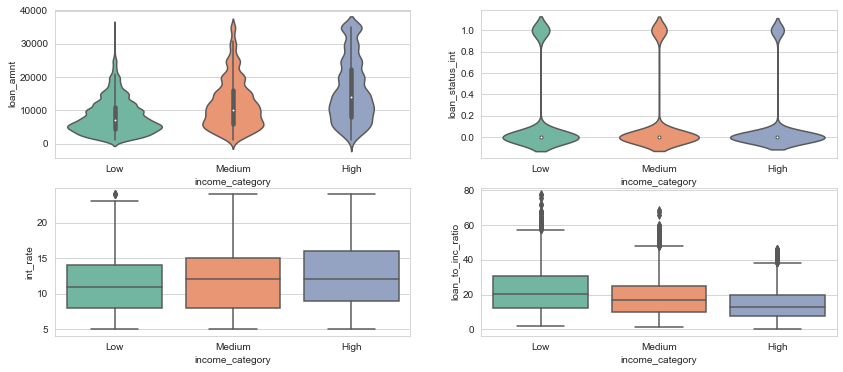

In [53]:
# Plot of income category vs different variables
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))

# Plot of income category vs loan amount
sns.violinplot(x="income_category", y="loan_amnt", data=df, palette="Set2", ax=ax1 )

# Plot of income category vs loan status
sns.violinplot(x="income_category", y="loan_status_int", data=df, palette="Set2", ax=ax2)

# Plot of income category vs interest rate
sns.boxplot(x="income_category", y="int_rate", data=df, palette="Set2", ax=ax3)

# Plot of income category vs loan/income ratio
sns.boxplot(x="income_category", y="loan_to_inc_ratio", data=df, palette="Set2", ax=ax4)
plt.show()

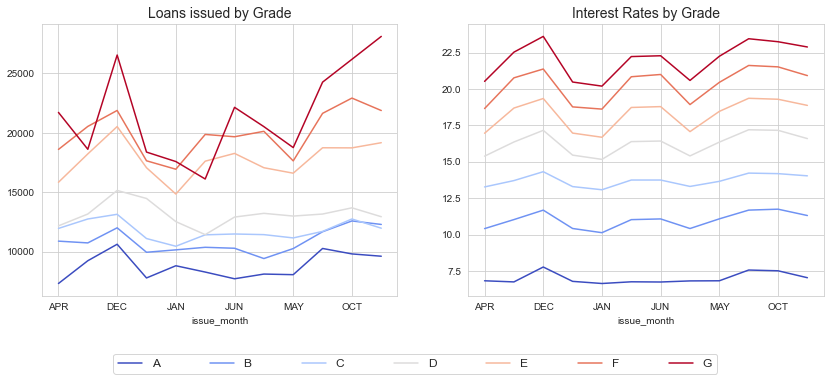

In [54]:
# Let's Plot how many loans were issued by grade
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['issue_month', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 5), colormap=cmap)
ax1.set_title('Loans issued by Grade', fontsize=14)
    
    
by_inc = df.groupby(['issue_month', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 5), colormap=cmap)
ax2.set_title('Interest Rates by Grade', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12}, ncol=7, mode="expand", borderaxespad=0.)
plt.show()


# Section (C) Risk analysis with TopN criteria for charged-off loans.
### Now that we have completed analysis and concluded on the dataset in 2011, which is representative of the whole population, we will move on to charged-off loans between 2007 and 2011.

In [55]:
def printHistogram(desc, series):
    print(desc.upper())
    print(series.describe())
    plt.hist(series)
    plt.show()
    return

## Step 1. Does charged-off loans get influenced by term and interest rates?

#### Objective: Identify the influence of terms and interest rates.
#### Observation:  For those with 36 months term, approx 1900 of them dropped out when interest rate was 11 - 15 percent. From 60 months term, about 900 of them dropped out when interest rate was 15 - 17 percent. Observe that the defaulter count is low for 36 months as interest rate increases. 
### Conclusion: For either terms, if the interest rate is reduced, defaulting behavior can be reduced.


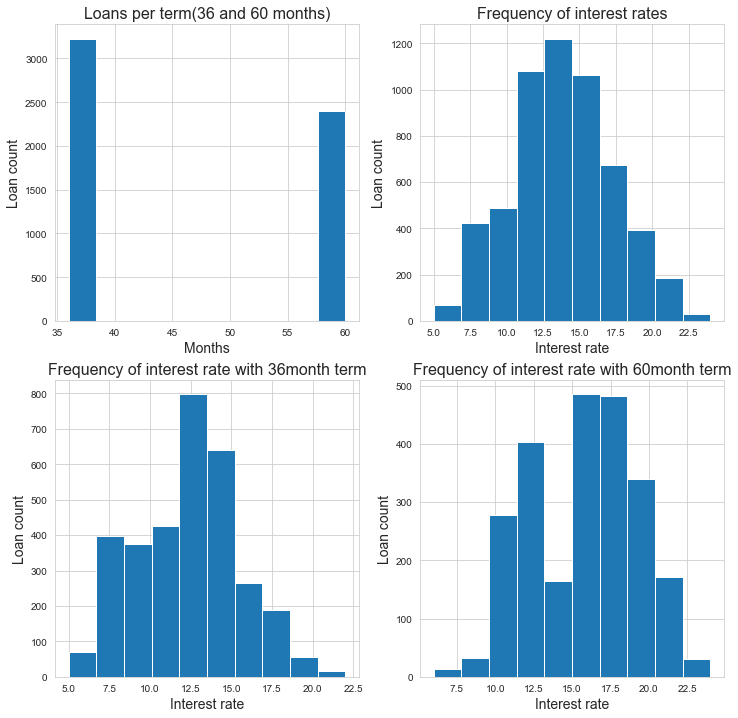

In [56]:
#dfChargedOff is the dataframe with charged-off loans between 2007 and 2011
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.hist(dfChargedOff['term'])
plt.title('Loans per term(36 and 60 months)', fontsize=16)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Loan count', fontsize=14)

plt.subplot(2,2,2)
plt.hist(dfChargedOff['int_rate'])
plt.title('Frequency of interest rates', fontsize=16)
plt.xlabel('Interest rate', fontsize=14)
plt.ylabel('Loan count', fontsize=14)

_36monthChargedOff = dfChargedOff[dfChargedOff['term'] == 36]
_60monthChargedOff = dfChargedOff[dfChargedOff['term'] == 60]

plt.subplot(2,2,3)
plt.hist(_36monthChargedOff['int_rate'])
plt.title('Frequency of interest rate with 36month term', fontsize=16)
plt.xlabel('Interest rate', fontsize=14)
plt.ylabel('Loan count', fontsize=14)

plt.subplot(2,2,4)
plt.hist(_60monthChargedOff['int_rate'])
plt.title('Frequency of interest rate with 60month term', fontsize=16)
plt.xlabel('Interest rate', fontsize=14)
plt.ylabel('Loan count', fontsize=14)

plt.show()

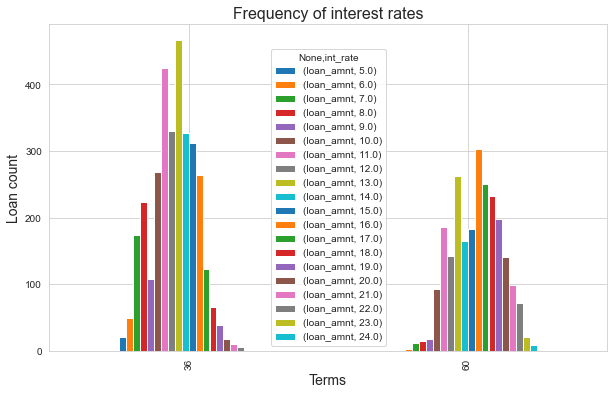

In [57]:
pt = pd.pivot_table(data=dfChargedOff, values=['loan_amnt'], index=['term'], columns = ['int_rate'], aggfunc='count')
pt.plot(kind="bar", figsize=[10,6])
plt.title('Frequency of interest rates', fontsize=16)
plt.xlabel('Terms', fontsize=14)
plt.ylabel('Loan count', fontsize=14)

plt.show()

## Step 2. Does charged-off loans get influenced by term and credit history?

#### Objective: Understand the influence of credit history and term on charge-off tendency.
#### Observation:  As the credit_history (derived from earliest credit line and loan issued year) increases, the defaulters count reduces drastically.
### Conclusion: For both terms with credit_history note that the defaulters drastically reduce for both terms 36 and 60 as the credit_history (age of the person) increases. Its risky to give loans to customers with credit history between 5 to 15 years.

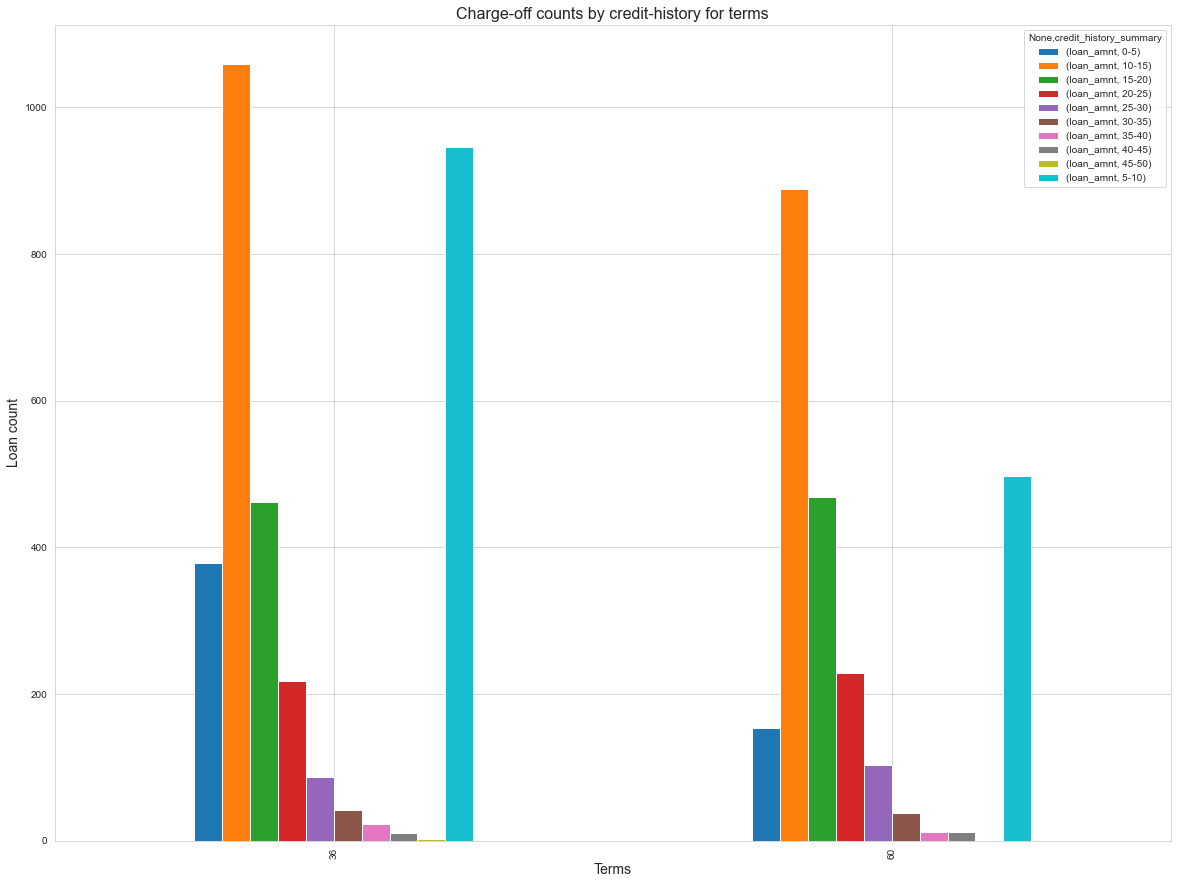

In [58]:
def grpCredHist(x):
    y = math.ceil(x / 5)
    return (str((y-1) * 5) + "-"+ str(y * 5))

dfChargedOff['credit_history_summary'] = dfChargedOff['credit_history'].apply(grpCredHist)
pt = pd.pivot_table(data=dfChargedOff, values=['loan_amnt'], index=['term'], columns=['credit_history_summary'],\
                    aggfunc='count')
pt.plot(kind="bar", figsize=[20,15])
plt.title("Charge-off counts by credit-history for terms", fontsize = 16)
plt.xlabel('Terms', fontsize=14)
plt.ylabel('Loan count', fontsize=14)
plt.show()

## Step 3. We want to find the reason for charged-off loans. What are the top 4 states, purposes and months of the year, for which charged-off numbers are high?

#### Objective: Identify top 4 states, purposes and months where charge-off is high.
#### Observation:  The top 4 states are 'CA', 'FL', 'NY', 'TX'. Top 4 purpose for which loan is issued are 'debt_consolidation', 'other', 'credit_card', 'small_business'. Top 4 months when loan issued are defaulted - 'DEC', 'NOV', 'OCT', 'SEP'
### Conclusion: In the above mentioned 4 months (specifically Nov and Dec), customers ask for loan with debt consolidation as a reason in the 4 (especially California) states and default maximum. Towards the end of the year, as celebration begins, customers prepare to take the loan and spend-off and default.

In [59]:
#Bar plotting loan counts across issue month, states and purpose was too distracting.
#We will restrict it to TOP 4 months, states and purpose
print(dfChargedOff['issue_month'].value_counts()[:4])
print(dfChargedOff['purpose'].value_counts()[:4])
print(dfChargedOff['addr_state'].value_counts()[:4])

top4MONTHS_Filter = dfChargedOff['issue_month'].isin(['DEC', 'NOV', 'OCT', 'SEP'])
top4PURPOSE_Filter = dfChargedOff['purpose'].isin(['debt_consolidation', 'other', 'credit_card', 'small_business'])
top4STATE_Filter = dfChargedOff['addr_state'].isin(['CA', 'FL', 'NY', 'TX'])

top4MONTHS_dfChargedOff = dfChargedOff[top4MONTHS_Filter]
top4STATES_dfChargedOff = dfChargedOff[top4STATE_Filter]
top4PURPOSE_dfChargedOff = dfChargedOff[top4PURPOSE_Filter]


DEC    678
NOV    598
OCT    580
SEP    547
Name: issue_month, dtype: int64
debt_consolidation    2767
other                  633
credit_card            542
small_business         475
Name: purpose, dtype: int64
CA    1125
FL     504
NY     495
TX     316
Name: addr_state, dtype: int64


Text(0, 0.5, 'Loan count')

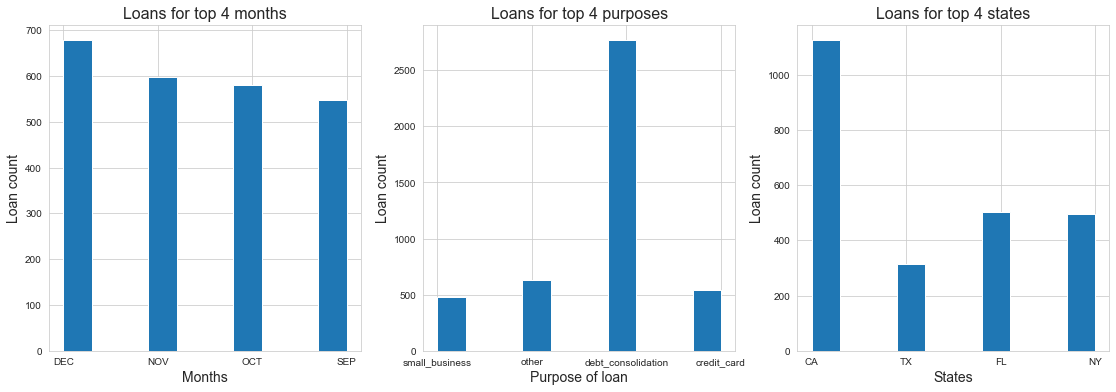

In [60]:
plt.figure(figsize=(19, 6))

plt.subplot(1,3,1)
plt.hist(top4MONTHS_dfChargedOff['issue_month'])
plt.title('Loans for top 4 months', fontsize=16)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Loan count', fontsize=14)

plt.subplot(1,3,2)
plt.hist(top4PURPOSE_dfChargedOff['purpose'])
plt.title('Loans for top 4 purposes', fontsize=16)
plt.xlabel('Purpose of loan', fontsize=14)
plt.ylabel('Loan count', fontsize=14)

plt.subplot(1,3,3)
plt.hist(top4STATES_dfChargedOff['addr_state'])
plt.title('Loans for top 4 states', fontsize=16)
plt.xlabel('States', fontsize=14)
plt.ylabel('Loan count', fontsize=14)



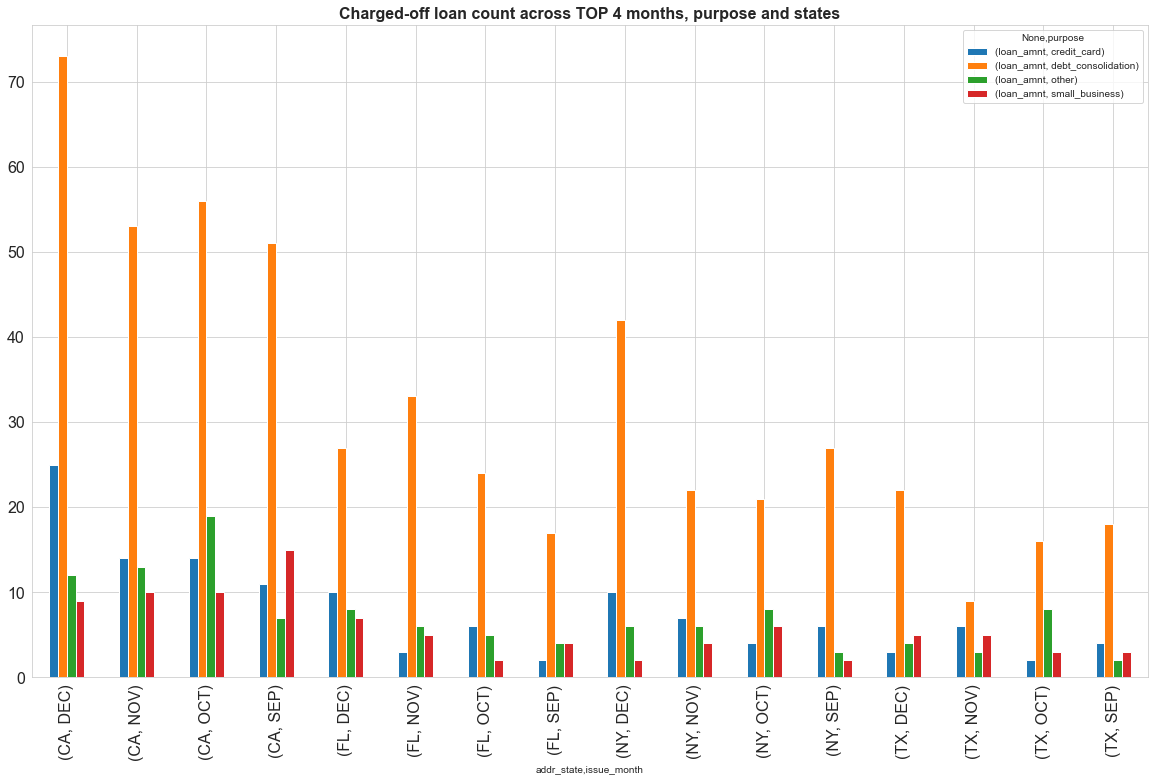

In [61]:
TOP4_dfChargedOff = dfChargedOff[top4MONTHS_Filter & top4PURPOSE_Filter & top4STATE_Filter]
TOP4_dfChargedOff.head()

pt = pd.pivot_table(data=TOP4_dfChargedOff, index=['addr_state', 'issue_month'], columns=['purpose'], \
                    values=['loan_amnt'], aggfunc='count')
pt.plot(kind="bar", figsize=[20,12], fontsize=16)
plt.title("Charged-off loan count across TOP 4 months, purpose and states", fontsize = 16, fontweight ='bold') 
plt.show()


## Step 4. Within the top 4, does credit_history have any impact to default?

#### Objective: Identify if credit history has an impact for top 4 states, months, reasons. 
#### Observation:  Loan counts for top 4 months split across credit_history yields the same result as Step 2. Customers with 5-15 years tend to default. Drilling down a level, for debt consolidation, in California, in Nov-Dec the same pattern is preserved.
### Conclusion: Giving loan to a customer with credit history between 5 - 15 years in the top 4 states, for the last quarter of the year, for top 4 purposes is risky.

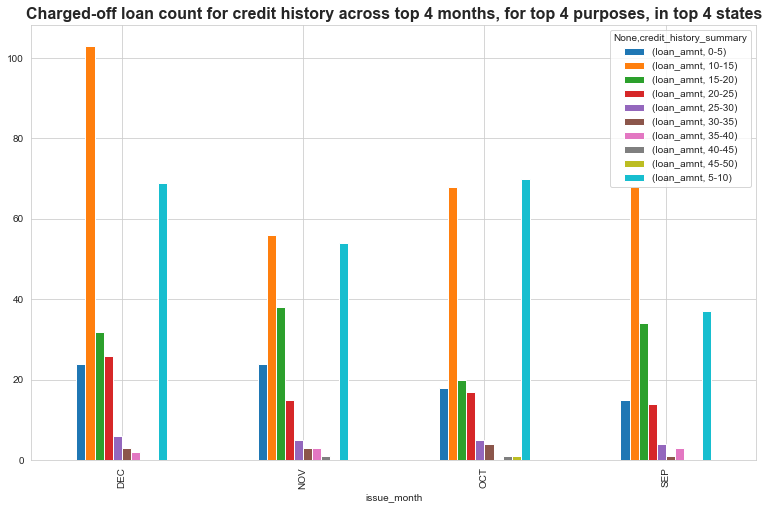

In [62]:
#Lets check if credit history has an impact on top4 (month, state, purpose)
pt = pd.pivot_table(data=TOP4_dfChargedOff, index=['issue_month'], columns=['credit_history_summary'], \
                    values=['loan_amnt'], aggfunc='count')
pt.plot(kind="bar", figsize=[13,8])
plt.title("Charged-off loan count for credit history across top 4 months, for top 4 purposes, in top 4 states", fontsize = 16, fontweight ='bold') 
plt.show()

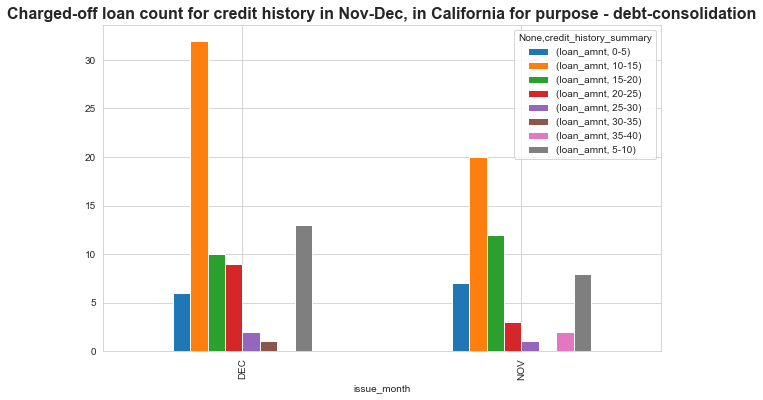

In [63]:
#Lets check if credit history has an impact on  Nov, Dec, debt cons in California
#This is just to drill one step down and confirm
NOVDEC_Filter = dfChargedOff['issue_month'].isin(['DEC', 'NOV'])
DEBT_CONS_Filter = dfChargedOff['purpose'].isin(['debt_consolidation'])
CALIFORNIA_Filter = dfChargedOff['addr_state'].isin(['CA'])

_2Mn_dbt_CA_dfChargedOff = dfChargedOff[NOVDEC_Filter & DEBT_CONS_Filter & CALIFORNIA_Filter]

pt = pd.pivot_table(data=_2Mn_dbt_CA_dfChargedOff, index=['issue_month'], columns=['credit_history_summary'], \
                    values=['loan_amnt'], aggfunc='count')
pt.plot(kind="bar", figsize=[10,6])
plt.title("Charged-off loan count for credit history in Nov-Dec, in California for purpose - debt-consolidation", fontsize = 16, fontweight ='bold') 
plt.show()

## Step 5. Within the top 4, does current employment length have any influence to default?

#### Objective: Identify if current employment length has an impact for top 4 states, months, reasons. 
#### Observation:  Loan counts for top 4 months split across emp_length yields that employees with less than 2 years of employment length default the most. As the number of years of employment with the current employer increases, the tendency to default reduces steeply.
### Conclusion: Lending money to customers fitting top 4 criteria with employment length less than 2 years is risky.

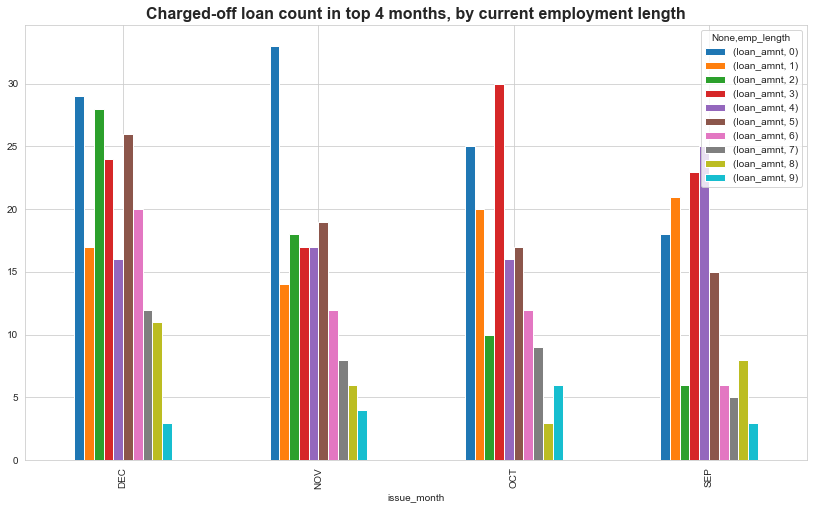

In [64]:
#Remove employment greater than 10 years as it gives a false negative.
EMPLEN_Filter = ~TOP4_dfChargedOff['emp_length'].isin(['10'])
emp_LT10_TOP4_dfChargedOff = TOP4_dfChargedOff[EMPLEN_Filter]

pt = pd.pivot_table(data=emp_LT10_TOP4_dfChargedOff, index=['issue_month'], columns=['emp_length'], \
                    values=['loan_amnt'], aggfunc='count')
pt.plot(kind="bar", figsize=[14,8])
plt.title("Charged-off loan count in top 4 months, by current employment length", fontsize = 16, fontweight ='bold') 
plt.show()

## Step 6. Now that we know in last quater, especially December, customers take debt consolidation loan and default. Does home ownership affect defaulting nature?

#### Objective - Analyze if home ownership has any ifluence on defaulting nature for top4 criteria customers.
#### Observation - Yes, those who rent default significantly higher than mortagers and mortgagers default higher than home owners. 
### Conclusion - If a customer fitting top 4 criteria in rental home, applies for loan with purpose debt consolidation in the last 4 months, its risky.

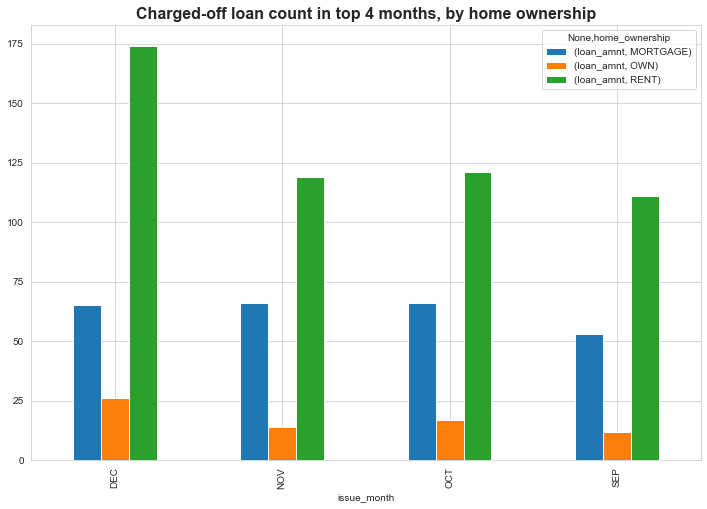

In [65]:
pt = pd.pivot_table(data=TOP4_dfChargedOff, index=['issue_month'], columns=['home_ownership'], \
                    values=['loan_amnt'], aggfunc='count')
pt.plot(kind="bar", figsize=[12,8])
plt.title("Charged-off loan count in top 4 months, by home ownership", fontsize = 16, fontweight ='bold') 
plt.show()

## Step 7. For the months Nov, Dec, in the state of California, those customers who take loan with reason as debt consolidation, we want to know the revolving utilization impact on defaulters.

#### Objective - Analyze if revolving utilization has any impact on default tendency when combined with employment length and home ownership.
#### Observation - A powerful pattern emerges! Rental borrowers have distinctly higher revolving utilization rates. As employment length increase it reduces, but still significantly higer. 
### Conclusion - For rental customers, revolving utilization is highest, and specifically, it reduces as they spend more number of years with the same employer. So many reasons for calling rental clients risky.

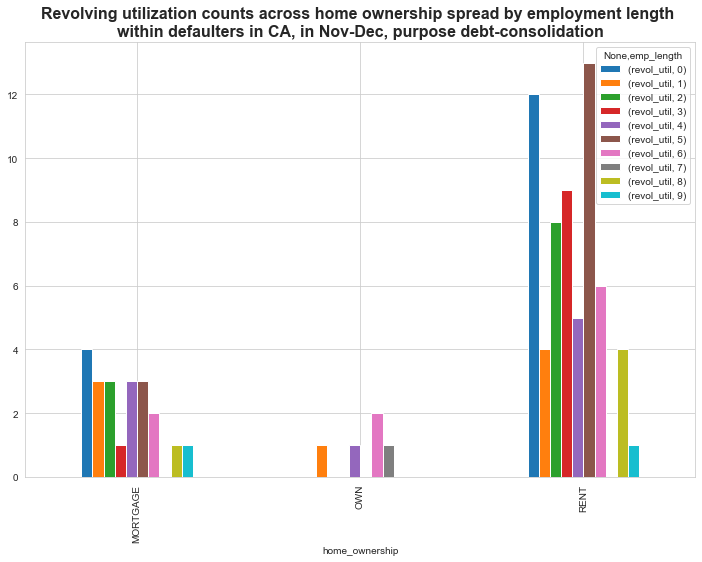

In [66]:
tmp_EMPLEN_Filter = ~_2Mn_dbt_CA_dfChargedOff['emp_length'].isin(['10'])
revol_util_df = _2Mn_dbt_CA_dfChargedOff[tmp_EMPLEN_Filter]
revol_util_df = revol_util_df.sort_values(by=['revol_util'])

pt = pd.pivot_table(data=revol_util_df, index=['home_ownership'], columns=['emp_length'], values=['revol_util'], \
                    aggfunc='count')
pt.plot(kind="bar", figsize=[12,8])
plt.title("Revolving utilization counts across home ownership spread by employment length \nwithin defaulters in CA, in Nov-Dec, purpose debt-consolidation",\
          fontsize = 16, fontweight ='bold') 
plt.show()

## Step 8. Does verification status impact the top 4 criteria defaulters?

#### Objective - Analyze if verification status has any impact on default tendency.
#### Observation - Loans that are source verified have lesser defaults. Its 1/3rd of total defaults.
### Conclusion - When loans are issued without source verification, they are very risky.

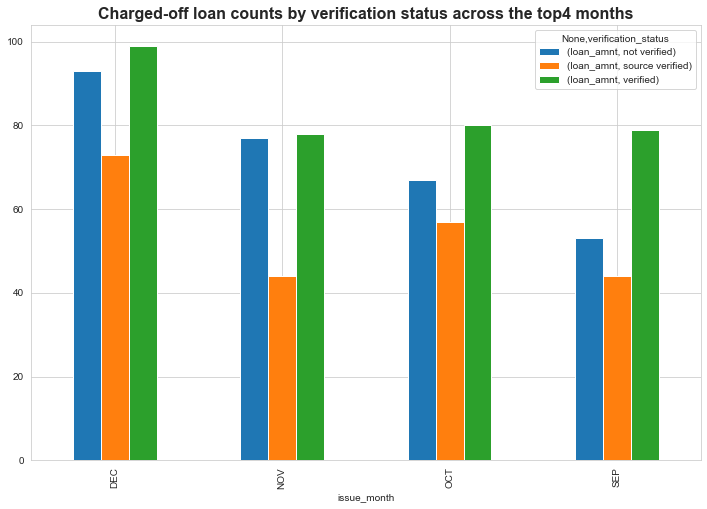

In [67]:
pt = pd.pivot_table(data=TOP4_dfChargedOff, index=['issue_month'], columns=['verification_status'], \
                    values=['loan_amnt'], aggfunc='count')
pt.plot(kind="bar", figsize=[12,8])
plt.title("Charged-off loan counts by verification status across the top4 months", fontsize = 16, fontweight ='bold') 
plt.show()

## Step 9. Now we know that in the last quater, especially December, customers take debt consolidation loan and default, especially those in rental homes. How early do these customers default?

#### Objective - Analyze if employment length and period within which they default are related.
#### Observation - As the employment length increases, the period they pay the installment becomes longer. Note that with lower employment length, the frequency of defaulting in the first 6, 12 and 18 months is higher and gradually reduces along the x-axis.

### Conclusion - Rental home defaulters, default within the first 6, 12 and 18 months, if they are employed for a shorter time in their current job.

In [68]:
#TOP 4 in all 3 and RENTED, emp_l < 10

l_EMPLEN_Filter = ~TOP4_dfChargedOff['emp_length'].isin(['10'])
l_RENTAL_Filter = TOP4_dfChargedOff['home_ownership'].isin(['RENT'])

empl_rent_TOP4_dfChargedOff = TOP4_dfChargedOff[l_EMPLEN_Filter & l_RENTAL_Filter]

lastPmtDat_analy = empl_rent_TOP4_dfChargedOff[~empl_rent_TOP4_dfChargedOff.last_pymnt_d.isnull()]

lastPmtDat_analy[['last_pymnt_d', 'issue_d']].describe()

lastPmtDat_analy['paid_period'] = \
((lastPmtDat_analy['last_pymnt_d'] - lastPmtDat_analy['issue_d'])/np.timedelta64(6, 'M')).round().astype(int)

#lastPmtDat_analy[['paid_period', 'term']]
#lastPmtDat_analy['paid_period'].value_counts()

lastPmtDat_analy = lastPmtDat_analy[lastPmtDat_analy['paid_period'] >= 0]
#lastPmtDat_analy['paid_period'].value_counts()


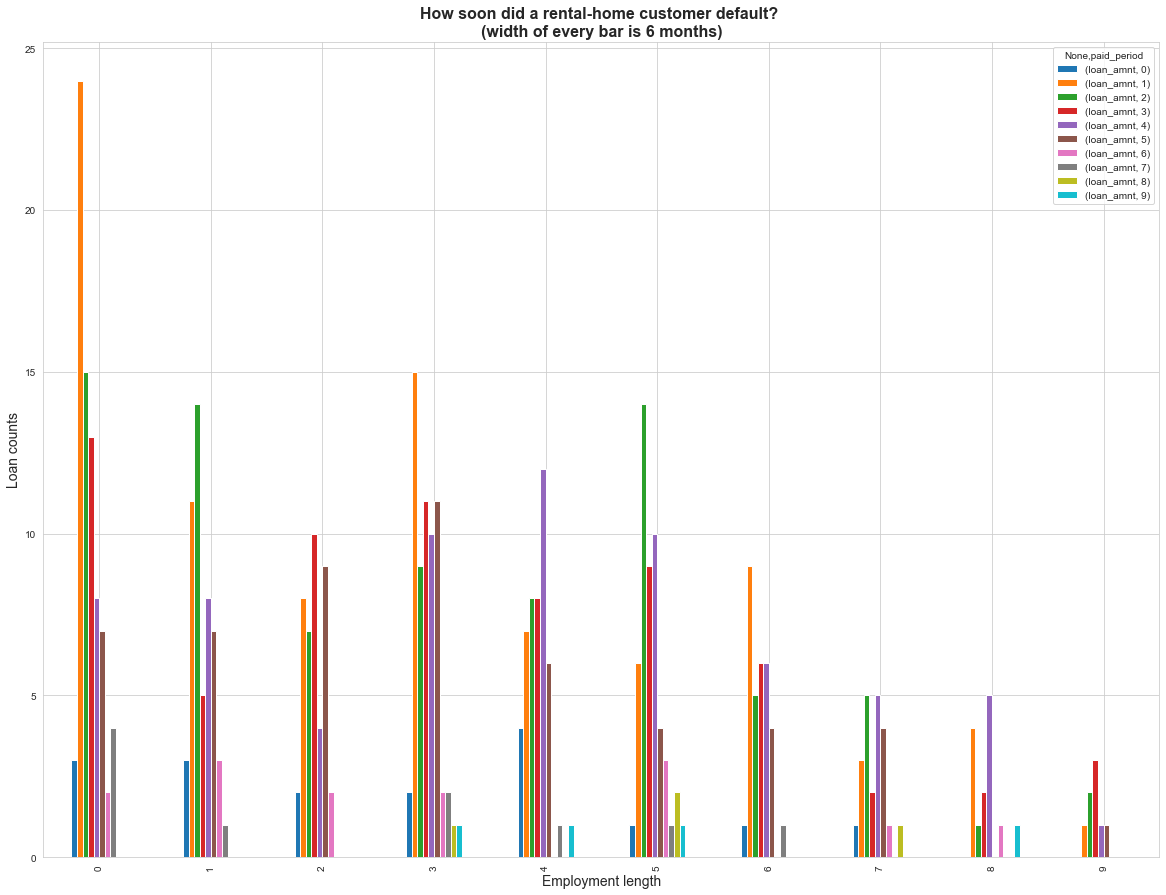

In [69]:
pt = pd.pivot_table(data=lastPmtDat_analy, index=['emp_length'], columns=['paid_period'], values=['loan_amnt'], aggfunc='count')
pt.plot(kind="bar", figsize=[20,15])
plt.title("How soon did a rental-home customer default? \n(width of every bar is 6 months)", \
          fontsize = 16, fontweight ='bold')
plt.xlabel('Employment length', fontsize=14)
plt.ylabel('Loan counts', fontsize=14)
plt.show()


## Step 10. In California (where highest default happens), for those defaulters with debt consolidation as reason, what is the representative recovery amount?

#### Objective - For the months Nov, Dec, in the state of California, those customers who take loan with reason as debt consolidation, we want to know what is the recovery rate. Recovery rate is the amount recovered as a percent of funded amount. The amount we refer is  principal + interest + other charges, which is total_pymnt. How much did we recover?
#### Observation - There is a pattern that the MEDIAN recovery rate is around 40% for those living in rented house and highest with those in their own home. Also for CA state the median recovery rate is only 53%. If you replace index to be 'addr_state', you can observe this. This indicates that customers in rented house bring down the median a lot.

### Conclusion - Its risky to give loan to rental customers, because its risky to recover the amount incase of default. 

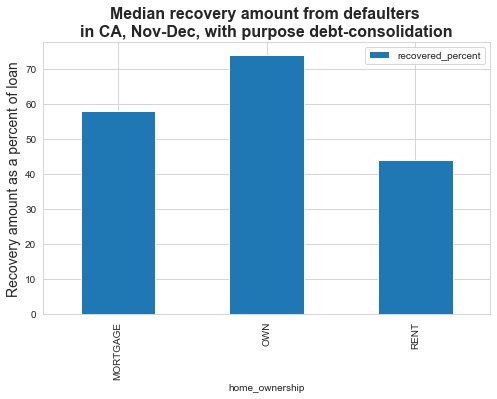

In [70]:
l_EMPLEN_Filter = ~_2Mn_dbt_CA_dfChargedOff['emp_length'].isin(['10'])
amt_recovered_df = _2Mn_dbt_CA_dfChargedOff[l_EMPLEN_Filter]

# total_pymnt = loan amount + interest amount CAN BE GREATER THAN 100
amt_recovered_df['recovered_percent'] = \
((amt_recovered_df['total_pymnt']/amt_recovered_df['funded_amnt'])*100).round().astype(int)
#amt_recovered_df['recovered_percent'].describe()

pt = pd.pivot_table(data=amt_recovered_df, index=['home_ownership'], values=['recovered_percent'], aggfunc=np.median)
pt.plot(kind="bar", figsize=[8,5])
plt.title("Median recovery amount from defaulters \nin CA, Nov-Dec, with purpose debt-consolidation", \
          fontsize = 16, fontweight ='bold')
plt.ylabel('Recovery amount as a percent of loan', fontsize=14)
plt.show()


## Step 11. What is the impact of DTI on defaulting nature?
#### Objective - In the months Nov, Dec, for the state of California, for those customers who take loan with reason as debt consolidation, we want to know the DTI relationship. 
#### Observation - For rental defaulters, the Median DTI is high and close to home owners. Considering the previous chart, since recovery is lowest amongst rental home owners, and DTI is higer than mortagers, its risky to lend money to rental owners.
##### Also when we seggregate the DTI w.r.t credit history, we see that its in the order of
##### 0 - 15 for Home owners
##### 0 - 20 for Mortgagers and
##### 0 - 40 for Rental folks - Wide spread. Rental customers, have a high and broader range of DTI, indicating that even though they are working for long, their debt is high compared to income inducing default.

### Conclusion - Risky to give loans to rental customers with higher DTI.

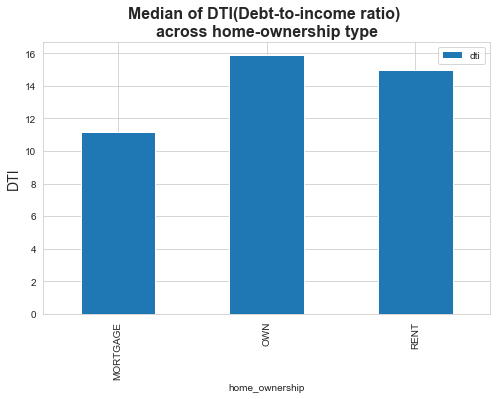

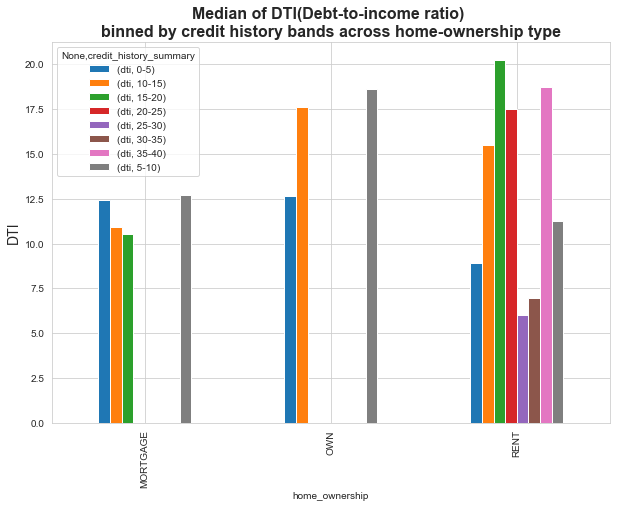

In [71]:
l_EMPLEN_Filter = ~_2Mn_dbt_CA_dfChargedOff['emp_length'].isin(['10'])
dtiAnalysis_df = _2Mn_dbt_CA_dfChargedOff[l_EMPLEN_Filter]

pt = pd.pivot_table(data=dtiAnalysis_df, index=['home_ownership'], values=['dti'], aggfunc=np.median)
pt.plot(kind="bar", figsize=[8,5])
plt.title("Median of DTI(Debt-to-income ratio) \nacross home-ownership type", fontsize = 16, fontweight ='bold')
plt.ylabel('DTI', fontsize=14)
plt.show()

pt = pd.pivot_table(data=dtiAnalysis_df, index=['home_ownership'], columns=['credit_history_summary'],\
                    values=['dti'], aggfunc=np.median)
pt.plot(kind="bar", figsize=[10,7])
plt.title("Median of DTI(Debt-to-income ratio) \nbinned by credit history bands across home-ownership type", fontsize = 16, fontweight ='bold')
plt.ylabel('DTI', fontsize=14)
plt.show()